## Final analysis

In [1]:
import pandas as pd
#all
all_data = pd.read_excel("Data2/מתכלל ראשון ושני.xlsx")

#sviot ratzon
all_data[all_data.columns[41]] = all_data[all_data.columns[41]].apply(lambda x: "כן" if x==0 else "לא")

#heil avir & yom alef
yom_alef_avir = all_data[(all_data["חיל אוויר"]=="כן")&(all_data["יום בשבוע"]=="ראשון")]
#heil avir & yom bet
yom_bet_avir = all_data[(all_data["חיל אוויר"]=="כן")&(all_data["יום בשבוע"]=="שני")]

#else & yom alef
yom_alef_else = all_data[(all_data["חיל אוויר"]=="לא")&(all_data["יום בשבוע"]=="ראשון")]

#else & yom bet
yom_bet_else = all_data[(all_data["חיל אוויר"]=="לא")&(all_data["יום בשבוע"]=="שני")]

In [2]:
all_data.dtypes

חותמת זמן                                                                             datetime64[ns]
מהו מגדרך?                                                                                    object
מהו סוג שירותך?                                                                               object
מהו מקום המגורים שלך?                                                                         object
מהו הבסיס אליו אתה מגיע?                                                                      object
מהו מתחם ההסעה בו אתה נמצא כעת?                                                               object
מהי תדירות יציאותיך מהבסיס?                                                                   object
מדוע הגעת לתחנה זו היום? (ניתן לסמן יותר מתשובה אחת)                                          object
באיזו שעה הוגדר לך להגיע לבסיס היום?                                                          object
באיזו שעה אתה מעריך שתגיע לבסיס היום?                                                      

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 44 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   חותמת זמן                                                                           1085 non-null   datetime64[ns]
 1   מהו מגדרך?                                                                          1085 non-null   object        
 2   מהו סוג שירותך?                                                                     1085 non-null   object        
 3   מהו מקום המגורים שלך?                                                               1079 non-null   object        
 4   מהו הבסיס אליו אתה מגיע?                                                            1056 non-null   object        
 5   מהו מתחם ההסעה בו אתה נמצא כעת?                 

In [4]:
import matplotlib.pyplot as plt
def four_plot_nominal(column_number = None, plot_color = 'teal', text_color = 'cyan'):
    """
    four graph for numinal objects
    """
    plt.style.use('ggplot')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.suptitle(all_data.columns[column_number][::-1], size = 20)
    ax1.tick_params(axis='both', which='major', labelsize=12)
    #יום א יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_alef_else[yom_alef_else.columns[column_number]].value_counts().index.tolist()]
    ax1.bar(labels,yom_alef_else[all_data.columns[column_number]].value_counts(), color = plot_color)
    ax1.set_title("יחידות צהל ללא חיל אויר יום א"[::-1])
    
    for j in range(len(yom_alef_else[yom_alef_else.columns[column_number]].value_counts())):
        txt = f"{round(yom_alef_else[yom_alef_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax1.text(j, yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[j]+5,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #יום ב יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_bet_else[yom_bet_else.columns[column_number]].value_counts().index.tolist()]
    ax2.bar(labels,yom_bet_else[yom_bet_else.columns[column_number]].value_counts(), color = plot_color)
    ax2.set_title("יחידות צהל ללא חיל אויר יום ב"[::-1])
    ax2.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_else[yom_bet_else.columns[column_number]].value_counts())):
        txt = f"{round(yom_bet_else[yom_bet_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax2.text(j, yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום א
    labels = [label[::-1] for label in yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts().index.tolist()]
    ax3.bar(labels,yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(), color = plot_color)
    ax3.set_title("חיל אויר יום א"[::-1])
    ax3.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts())):
        txt = f"{round(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax3.text(j, yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום ב
    labels = [label[::-1] for label in yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts().index.tolist()]
    ax4.bar(labels,yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(), color = plot_color)
    ax4.set_title("חיל אויר יום ב"[::-1])
    ax4.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts())):
        txt = f"{round(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax4.text(j, yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[j]-1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))
    
def all_plot_nominal(column_number = None, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (8,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts(), color = plot_color)
    for j in range(len(all_data[all_data.columns[column_number]].value_counts())):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+5,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.show()
    
def four_plot_nominal2(column_number = None, n= 10,height = 10, width = 10, plot_color = 'teal', text_color = 'cyan'):
    """
    four graph for numinal objects
    """
    plt.style.use('ggplot')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.set_figheight(height)
    fig.set_figwidth(width)
    fig.suptitle(all_data.columns[column_number][::-1], size = 20)

    #יום א יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_alef_else[yom_alef_else.columns[column_number]].value_counts().index.tolist()[:n]]
    ax1.bar(labels,yom_alef_else[all_data.columns[column_number]].value_counts()[:n], color = plot_color)
    ax1.set_xticklabels(labels,rotation=45)
    ax1.set_title("יחידות צהל ללא חיל אויר יום א"[::-1])
    ax1.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_alef_else[yom_alef_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax1.text(j, yom_alef_else[yom_alef_else.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #יום ב יחידות צהל ללא חיל אויר
    labels = [label[::-1] for label in yom_bet_else[yom_bet_else.columns[column_number]].value_counts().index.tolist()[:n]]
    ax2.bar(labels,yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[:n], color = plot_color)
    ax2.set_xticklabels(labels,rotation=45)
    ax2.set_title("יחידות צהל ללא חיל אויר יום ב"[::-1])
    ax2.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_bet_else[yom_bet_else.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax2.text(j, yom_bet_else[yom_bet_else.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום א
    labels = [label[::-1] for label in yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts().index.tolist()[:n]]
    ax3.bar(labels,yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[:n], color = plot_color)
    ax3.set_xticklabels(labels,rotation=45)
    ax3.set_title("חיל אויר יום א"[::-1])
    ax3.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax3.text(j, yom_alef_avir[yom_alef_avir.columns[column_number]].value_counts()[j],txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))

    #חיל אוויר יום ב
    labels = [label[::-1] for label in yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts().index.tolist()[:n]]
    ax4.bar(labels,yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[:n], color = plot_color)
    ax4.set_xticklabels(labels,rotation=45)
    ax4.set_title("חיל אויר יום ב"[::-1])
    ax4.tick_params(axis='both', which='major', labelsize=12)
    for j in range(len(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[:n])):
        txt = f"{round(yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        ax4.text(j, yom_bet_avir[yom_bet_avir.columns[column_number]].value_counts()[j]-1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.2'))
    
def all_plot_nominal2(column_number = None,n = 10, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (20,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()[:n]]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts()[:n], color = plot_color)
    
    for j in range(len(all_data[all_data.columns[column_number]].value_counts()[:n])):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.show()
#for ax in fig.get_axes():
    #ax.label_outer()
    
def all_plot_nominal3(column_number = None,n = 10, plot_color = 'teal', text_color = 'cyan'):
    plt.figure(figsize = (20,5))
    labels = [label[::-1] for label in all_data[all_data.columns[column_number]].value_counts().index.tolist()[:n]]
    plt.bar(labels,all_data[all_data.columns[column_number]].value_counts()[:n], color = plot_color)

    for j in range(len(all_data[all_data.columns[column_number]].value_counts()[:n])):
        txt = f"{round(all_data[all_data.columns[column_number]].value_counts(normalize = True)[j]*100,2)}%"
        plt.text(j, all_data[all_data.columns[column_number]].value_counts()[j]+1,txt,size=12,style = 'italic',color = "black",bbox=dict(facecolor=text_color,alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
    plt.title(all_data.columns[column_number][::-1])
    plt.xticks(rotation=90,size = 14)
    plt.show()

# מגדר

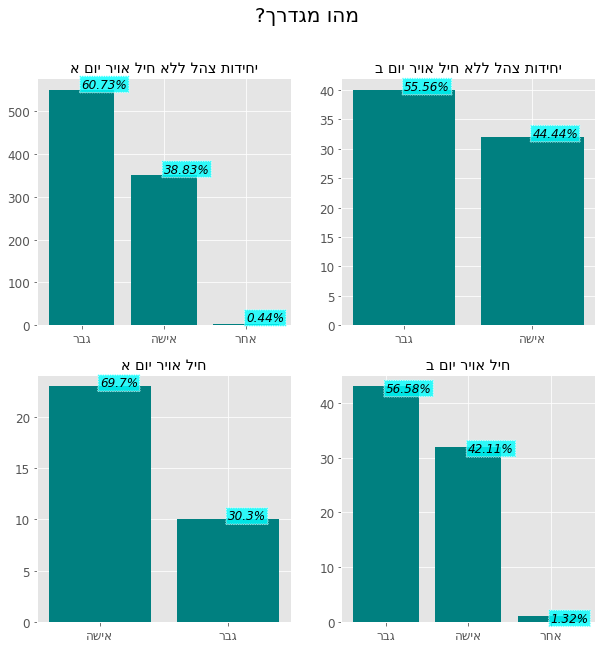

In [5]:
four_plot_nominal(1)

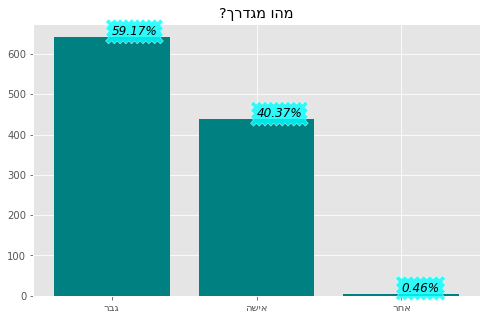

In [6]:
all_plot_nominal(1)

# סוג שירות

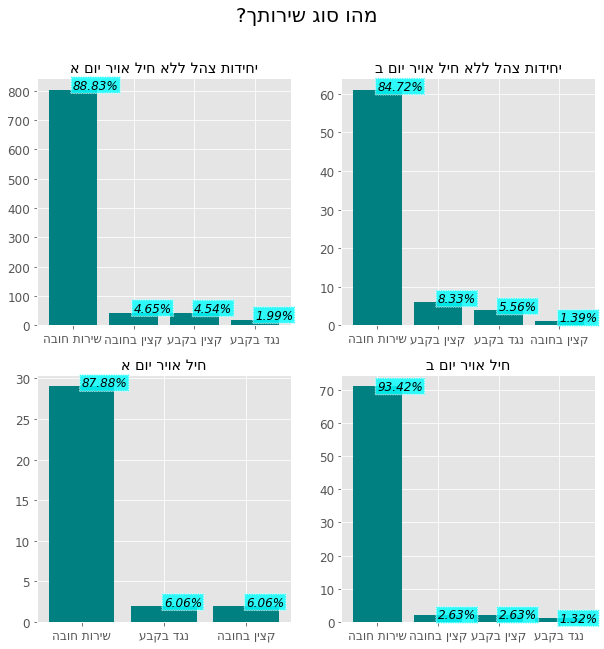

In [7]:
four_plot_nominal(2)

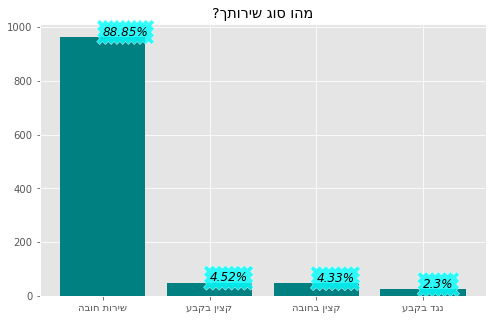

In [8]:
all_plot_nominal(2)

# מקום מגורים

C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


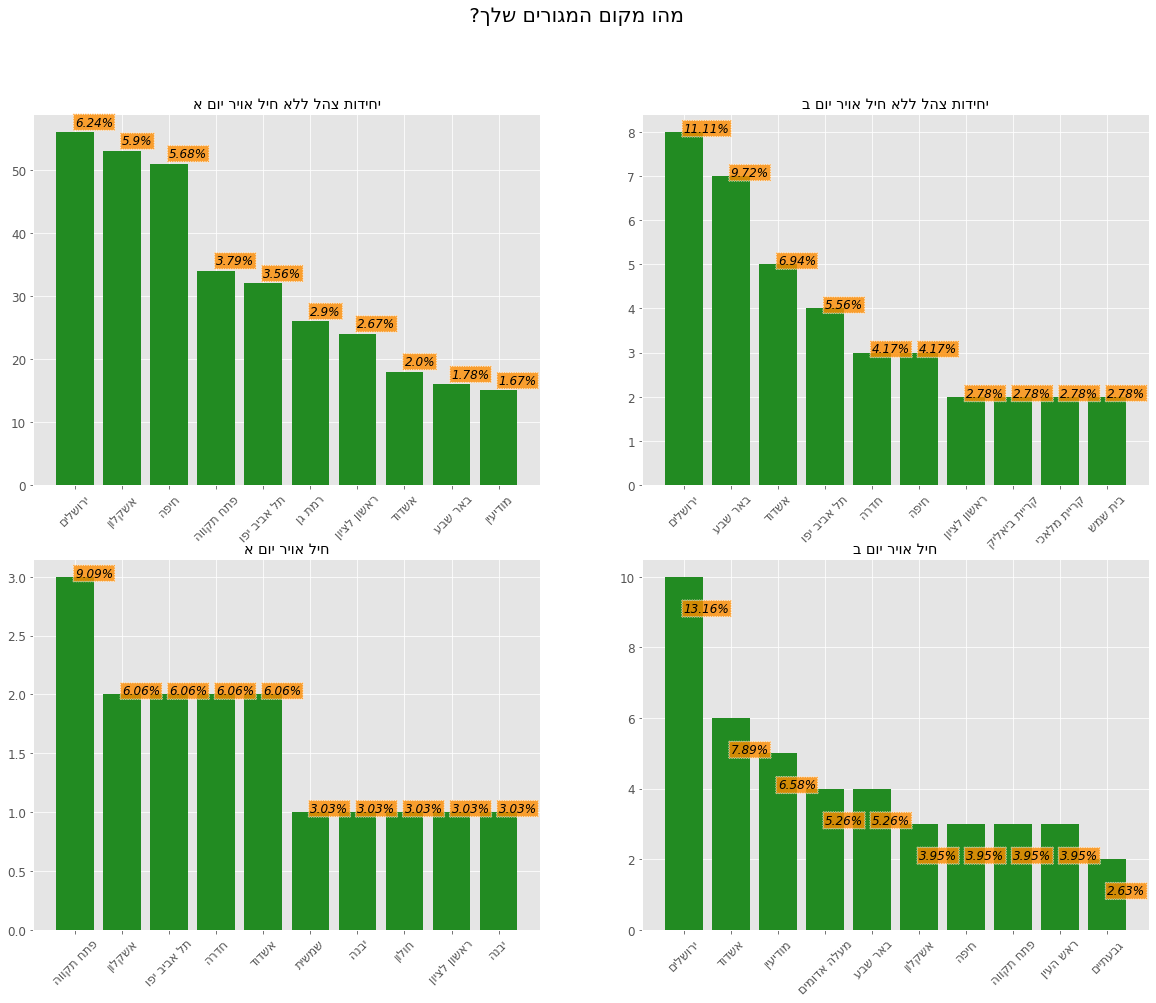

In [9]:
four_plot_nominal2(3,height = 15,width = 20,plot_color = 'forestgreen',text_color ='darkorange')

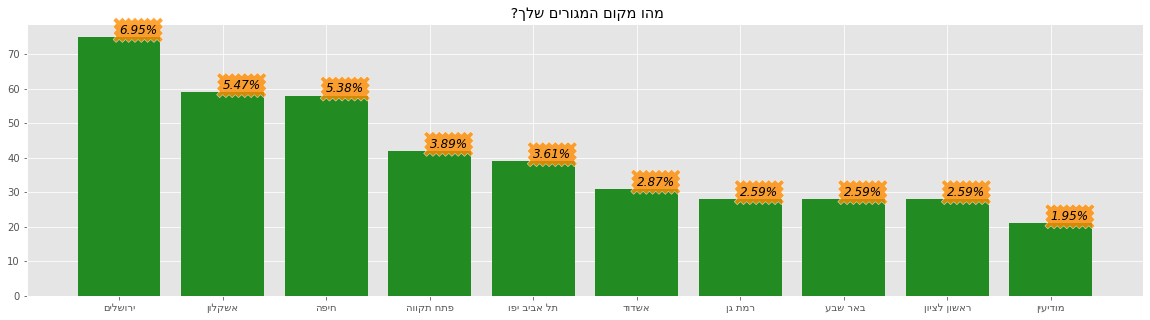

In [10]:
all_plot_nominal2(3,10,plot_color = 'forestgreen',text_color ='darkorange')

# בסיס

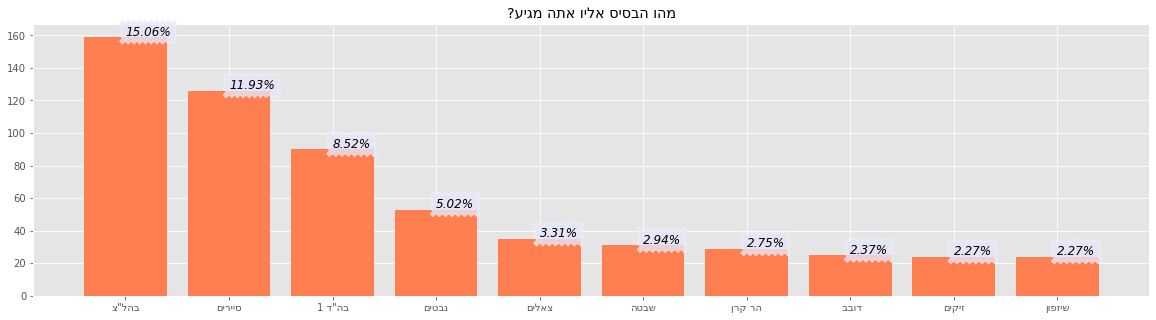

In [11]:
all_plot_nominal2(4,plot_color = 'coral',text_color ='lavender')

C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


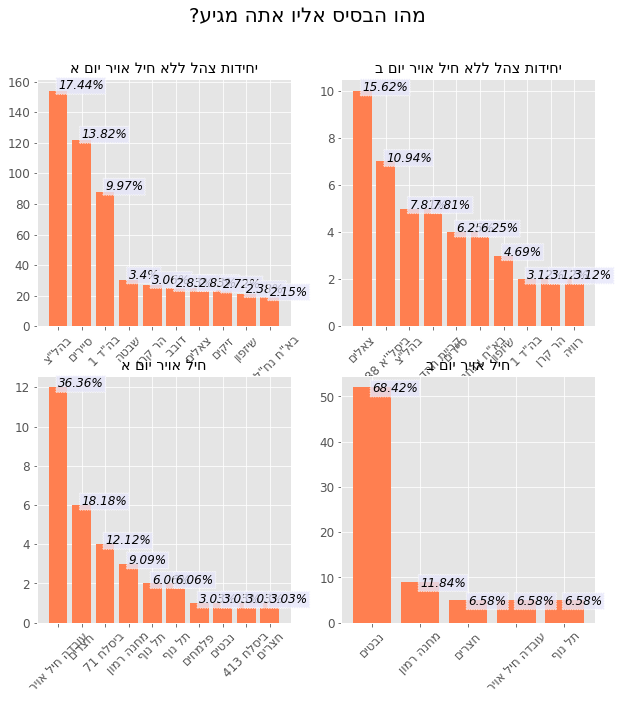

In [12]:
four_plot_nominal2(4,plot_color = 'coral',text_color ='lavender')

# מתחם הסעה

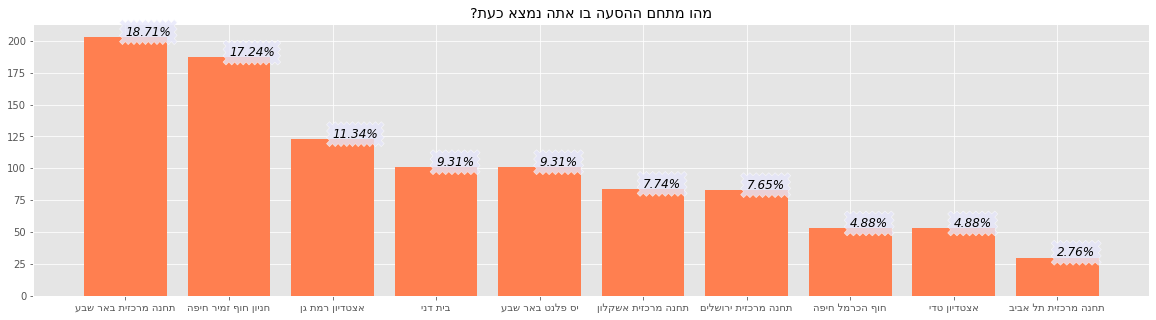

In [13]:
all_plot_nominal2(5,plot_color = 'coral',text_color ='lavender')

C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


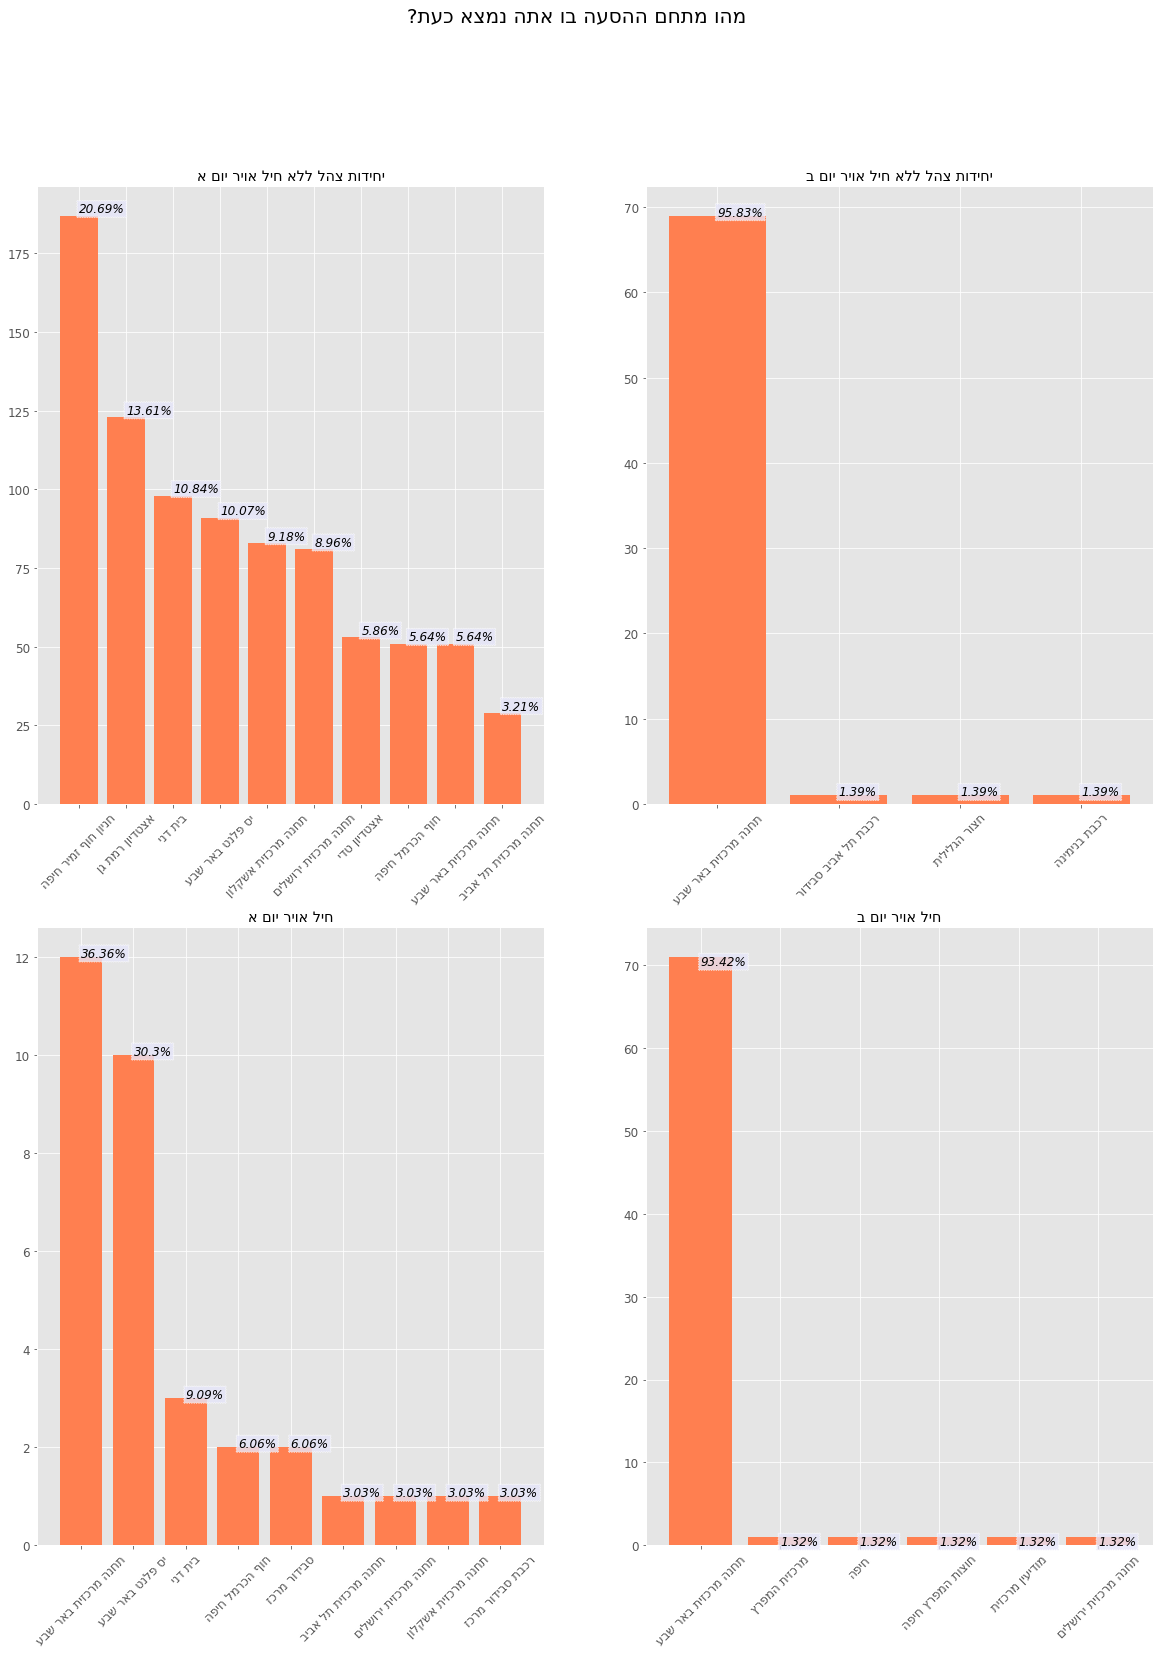

In [14]:
four_plot_nominal2(5,height = 25,width = 20,plot_color = 'coral',text_color ='lavender')

# תדירות יציאות מהבסיס

C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


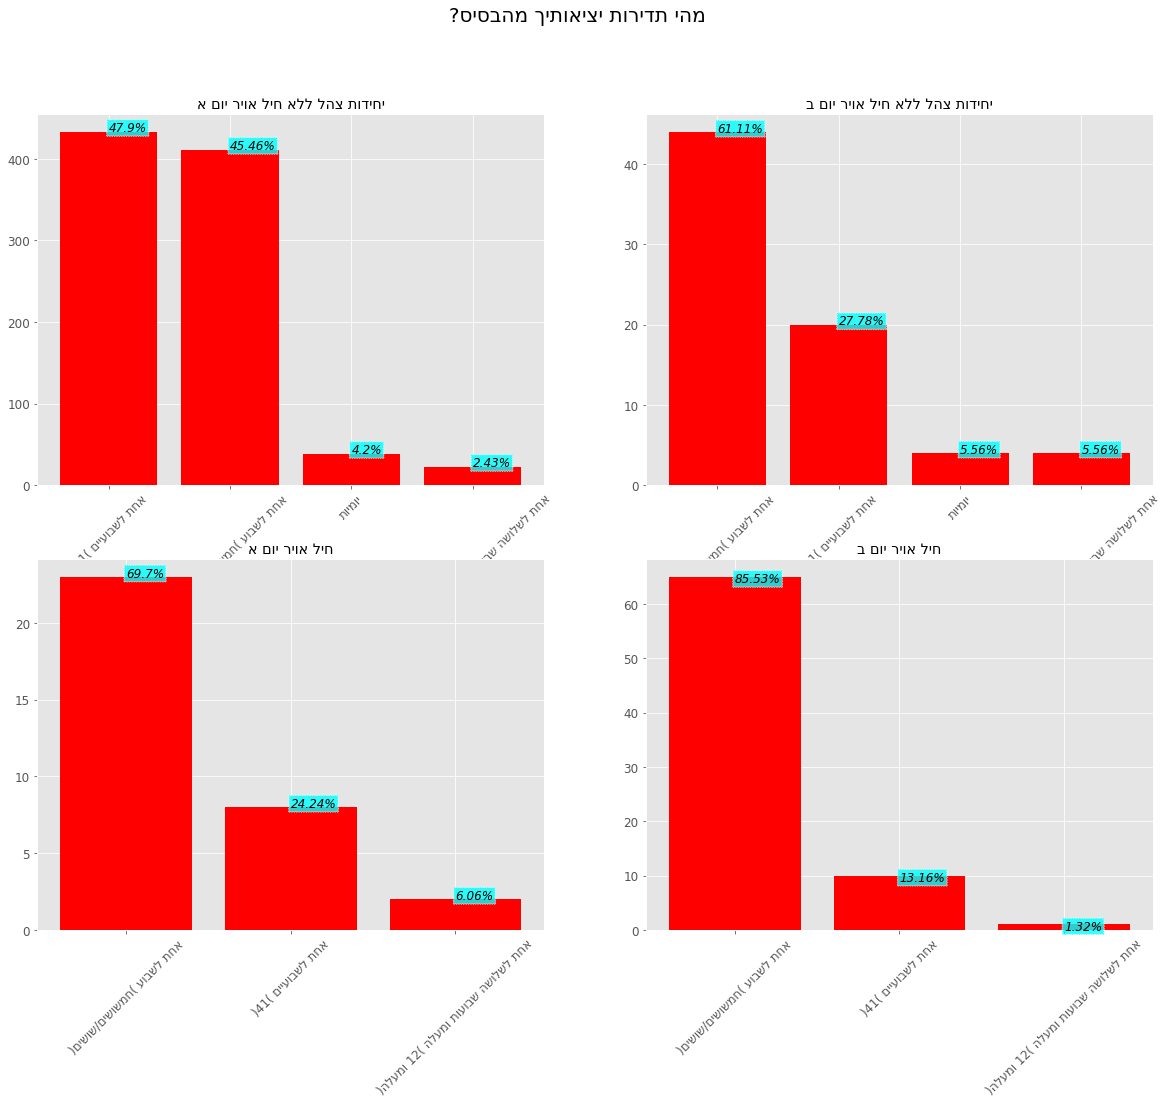

In [15]:
#a
four_plot_nominal2(6,4,15,20,'red','cyan')

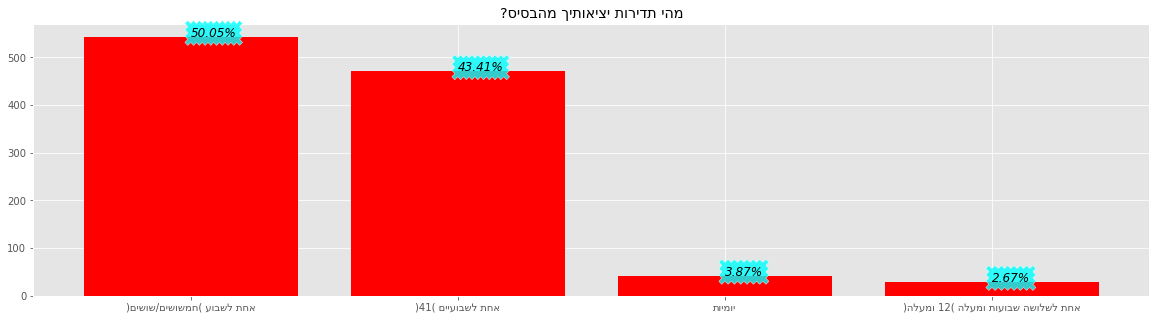

In [16]:
all_plot_nominal2(6,4,'red','cyan')

# סיבת הגעה לתחנה

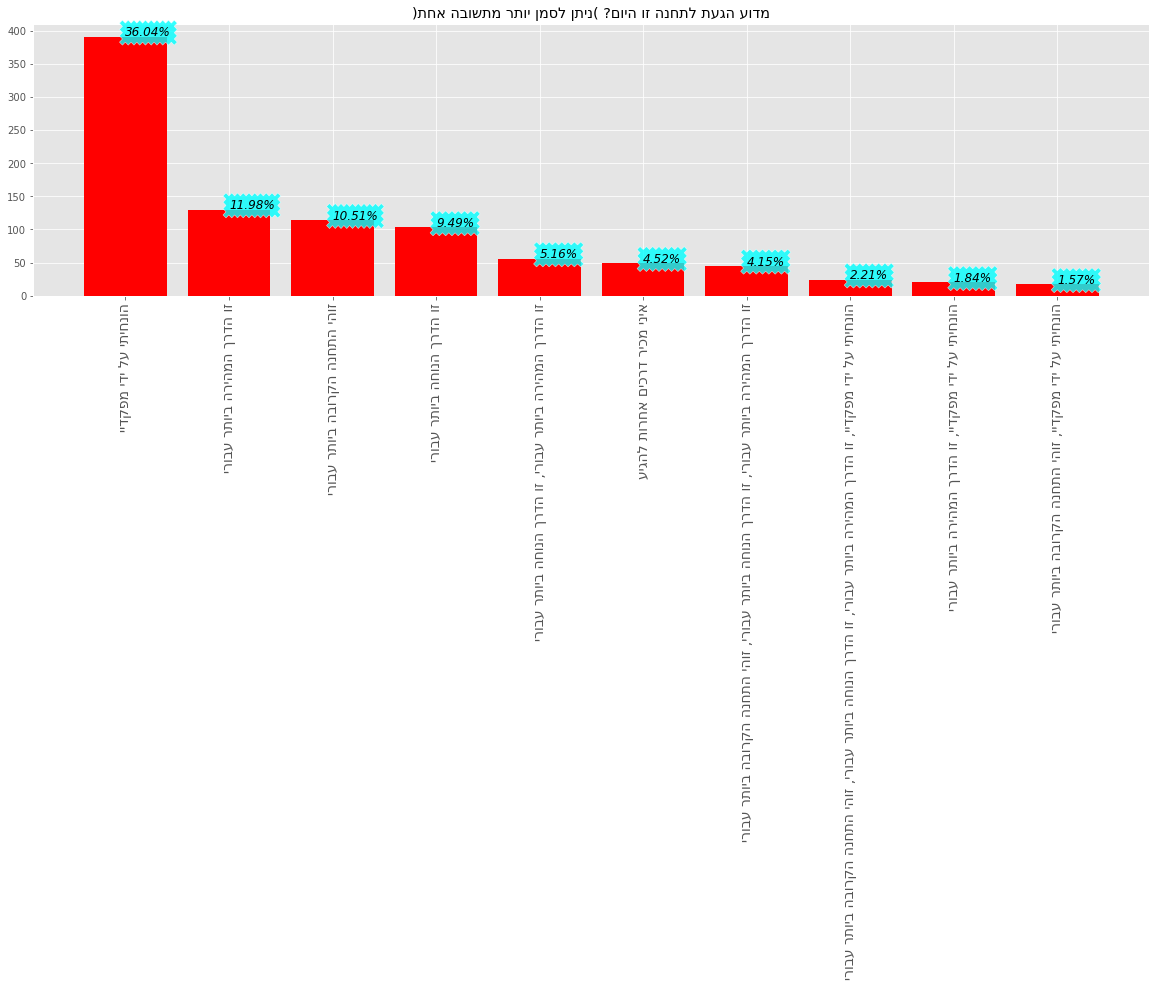

In [17]:
all_plot_nominal3(7,10,'red','cyan')

C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


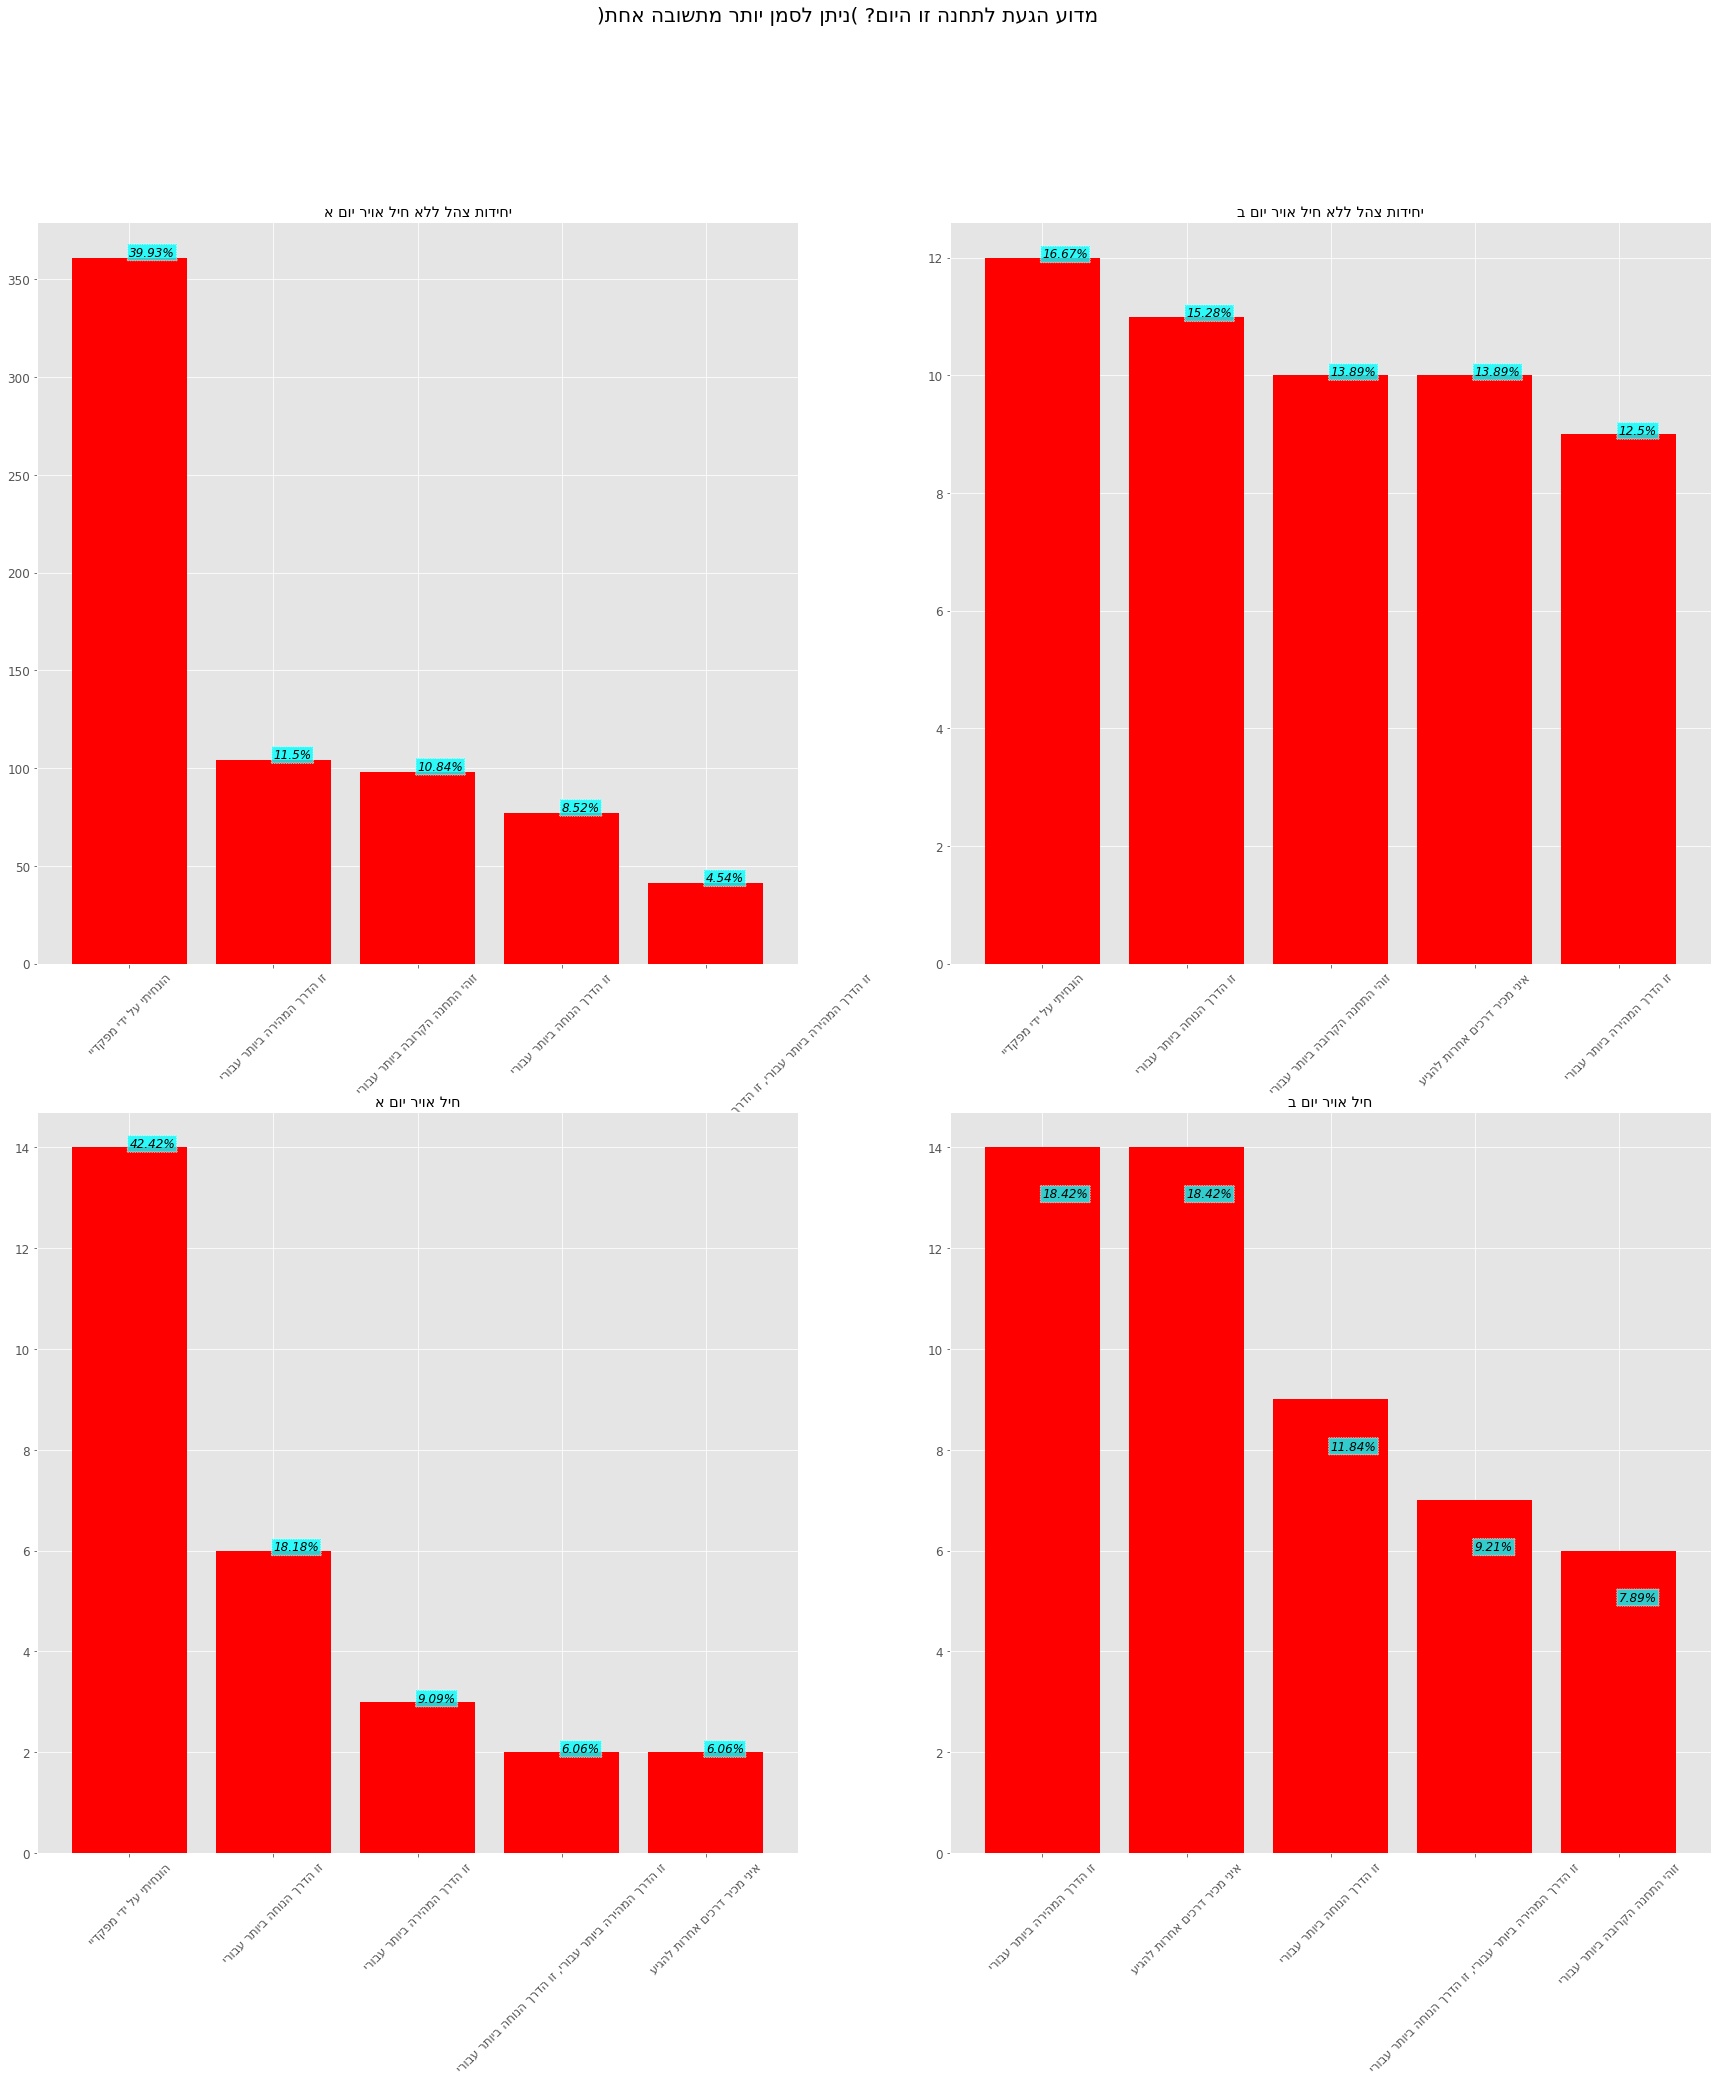

In [18]:
four_plot_nominal2(7,5,30,30,'red','cyan')

#  הצלבה בין שביעות רצון שאט"ל לבין חניון 

In [19]:
df = all_data.groupby(by = all_data.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                             count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                      
אצטדיון רמת גן                                                                  68   
חניון חוף זמיר חיפה                                                             62   
יס פלנט באר שבע                                                                 52   
בית דני                                                                         33   
תחנה מרכזית באר שבע                                                             28   
תחנה מרכזית ירושלים                                                             14   
אצטדיון טדי                                                                     13   
תחנה מרכזית אשקלון                                                              11   
חוף הכרמל חיפה                                                                   6   
תחנה מרכזית תל אביב                                                              6   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
אצטדיון רמת גן                   4.161765  
חניון חוף זמיר חיפה              4.161290  
יס פלנט באר שבע                  3.923077  
בית דני                          4.333333  
תחנה מרכזית באר שבע              4.107143  
תחנה מרכזית ירושלים              3.928571  
אצטדיון טדי                      4.615385  
תחנה מרכזית אשקלון               3.545455  
חוף הכרמל חיפה                   3.666667  
תחנה מרכזית תל אביב              3.500000

In [20]:
df = yom_alef_avir.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,4:6]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                        count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                 
תחנה מרכזית באר שבע                                                        12   
יס פלנט באר שבע                                                            10   
בית דני                                                                     3   
סבידור מרכז                                                                 2   
חוף הכרמל חיפה                                                              2   
תחנה מרכזית ירושלים                                                         1   
תחנה מרכזית אשקלון                                                          1   
תחנה מרכזית תל אביב                                                         1   
רכבת סבידור מרכז                                                            1   

                                       
                                 mean  
מהו מתחם ההסעה בו אתה נמצא כעת?        
תחנה מרכזית באר שבע              3.25  
יס פלנט באר שבע                  2.10  
בית דני                          4.00  
סבידור מרכז                      3.50  
חוף הכרמל חיפה                   3.00  
תחנה מרכזית ירושלים              5.00  
תחנה מרכזית אשקלון               4.00  
תחנה מרכזית תל אביב              4.00  
רכבת סבידור מרכז                 1.00

In [21]:
df = yom_bet_avir.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                         count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                  
תחנה מרכזית באר שבע                                                         71   
מודיעין מרכזית                                                               1   
תחנה מרכזית ירושלים                                                          1   
חוצות המפרץ חיפה                                                             1   
חיפה                                                                         1   
מרכזית המפרץ                                                                 1   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
תחנה מרכזית באר שבע              3.140845  
מודיעין מרכזית                   5.000000  
תחנה מרכזית ירושלים              5.000000  
חוצות המפרץ חיפה                 3.000000  
חיפה                             3.000000  
מרכזית המפרץ                     3.000000

In [22]:
df = yom_bet_else.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                         count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                  
תחנה מרכזית באר שבע                                                         69   
חצור הגלילית                                                                 1   
רכבת בנימינה                                                                 1   
רכבת תל אביב סבידור                                                          1   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
תחנה מרכזית באר שבע              3.608696  
חצור הגלילית                     3.000000  
רכבת בנימינה                     3.000000  
רכבת תל אביב סבידור              2.000000

In [23]:
df = yom_alef_else.groupby(by = yom_alef_avir.columns[5]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                             count   
מהו מתחם ההסעה בו אתה נמצא כעת?                                                      
אצטדיון רמת גן                                                                  68   
חניון חוף זמיר חיפה                                                             62   
יס פלנט באר שבע                                                                 52   
בית דני                                                                         33   
תחנה מרכזית ירושלים                                                             14   
אצטדיון טדי                                                                     13   
תחנה מרכזית אשקלון                                                              11   
תחנה מרכזית באר שבע                                                              9   
חוף הכרמל חיפה                                                                   6   
תחנה מרכזית תל אביב                                                              6   

                                           
                                     mean  
מהו מתחם ההסעה בו אתה נמצא כעת?            
אצטדיון רמת גן                   4.161765  
חניון חוף זמיר חיפה              4.161290  
יס פלנט באר שבע                  3.923077  
בית דני                          4.333333  
תחנה מרכזית ירושלים              3.928571  
אצטדיון טדי                      4.615385  
תחנה מרכזית אשקלון               3.545455  
תחנה מרכזית באר שבע              4.444444  
חוף הכרמל חיפה                   3.666667  
תחנה מרכזית תל אביב              3.500000

#  שביעות רצון תואמת 

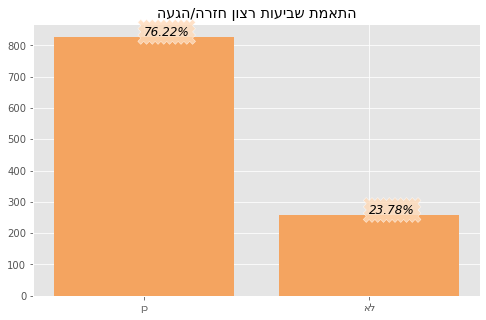

In [24]:
all_plot_nominal(41,'sandybrown','peachpuff')

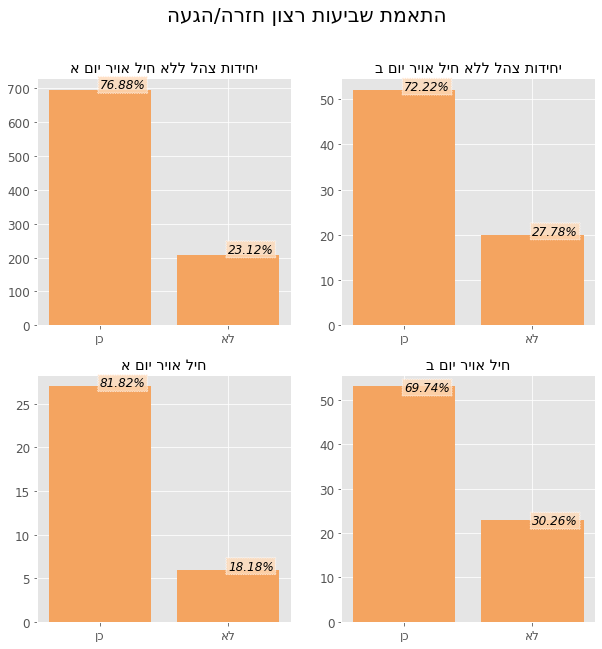

In [25]:
four_plot_nominal(41,'sandybrown','peachpuff')

#  השוואת שביעות רצון 

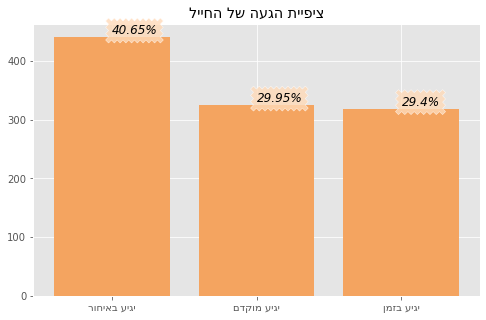

In [26]:
all_plot_nominal(-1,'sandybrown','peachpuff')

C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


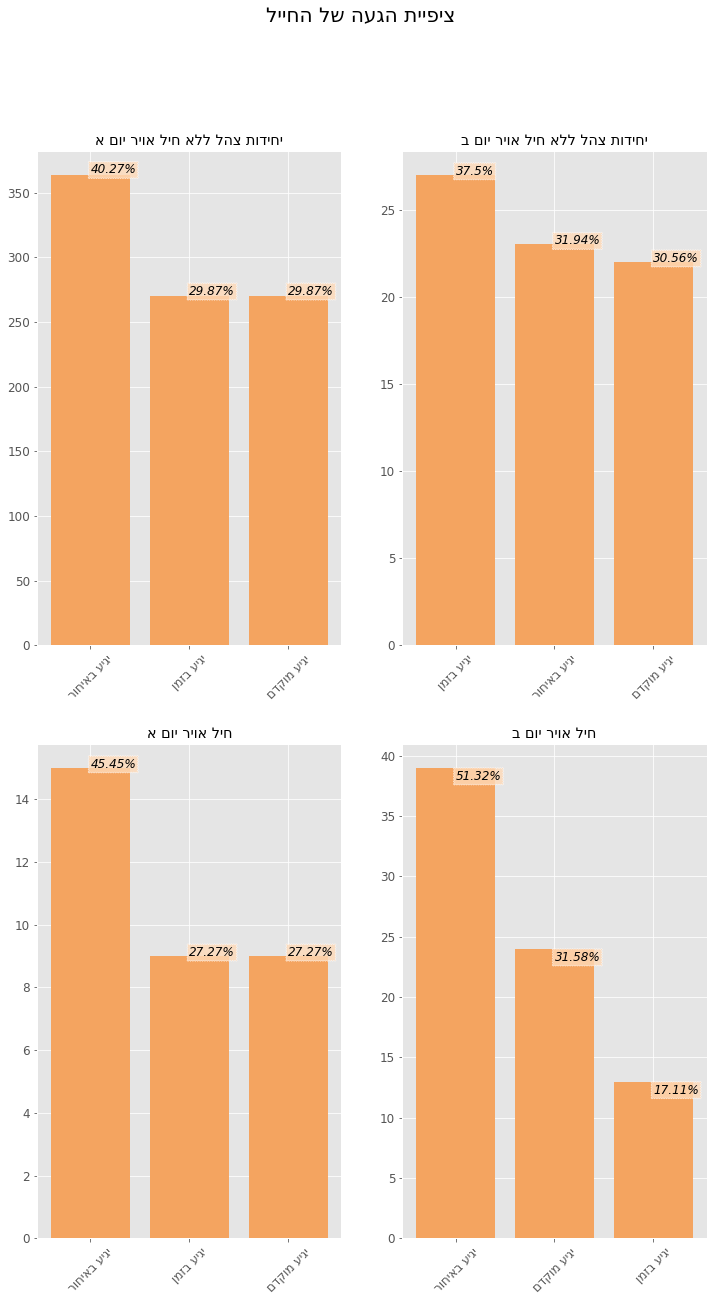

In [27]:
four_plot_nominal2(-1,3,20,12,'sandybrown','peachpuff')

#  הצלבה בין שביעות רצון שאט"ל לבין מקום מגורים 

In [28]:
df = all_data.groupby(by = all_data.columns[3]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                    count   
מהו מקום המגורים שלך?                                                       
ירושלים                                                                20   
תל אביב יפו                                                            15   
פתח תקווה                                                              14   
ראשון לציון                                                            13   
אשקלון                                                                 12   
רמת גן                                                                 12   
חיפה                                                                   11   
מודיעין                                                                10   
חולון                                                                   7   
ראש העין                                                                7   

                                  
                            mean  
מהו מקום המגורים שלך?             
ירושלים                 4.050000  
תל אביב יפו             4.466667  
פתח תקווה               4.285714  
ראשון לציון             3.692308  
אשקלון                  3.833333  
רמת גן                  3.666667  
חיפה                    3.909091  
מודיעין                 4.100000  
חולון                   4.714286  
ראש העין                4.142857

#  הצלבה בין שביעות רצון שאט"ל לבין מקום בסיס 

In [29]:
df = all_data.groupby(by = all_data.columns[4]).agg(['count','mean']).iloc[:,8:10]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?  \
                                                                      count   
מהו הבסיס אליו אתה מגיע?                                                      
בהל"צ                                                                    99   
סיירים                                                                   59   
דובב                                                                     19   
בא"ח נח"ל טוב                                                            14   
בה"ד 1                                                                   14   
קריית ההדרכה                                                             12   
שיזפון                                                                    9   
שבטה                                                                      8   
הר קרן                                                                    8   
מוצב יוספה                                                                5   

                                    
                              mean  
מהו הבסיס אליו אתה מגיע?            
בהל"צ                     4.060606  
סיירים                    4.237288  
דובב                      4.105263  
בא"ח נח"ל טוב             4.428571  
בה"ד 1                    4.000000  
קריית ההדרכה              4.166667  
שיזפון                    4.000000  
שבטה                      4.750000  
הר קרן                    3.750000  
מוצב יוספה                4.600000

# תדרוך יציאה הביתה

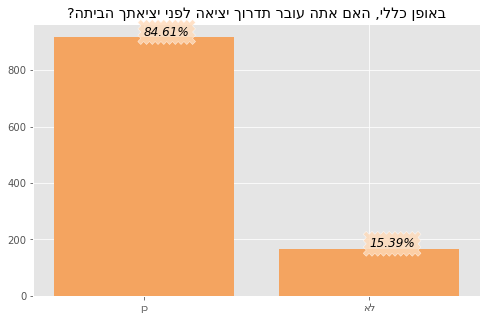

In [30]:
all_plot_nominal(12,'sandybrown','peachpuff')

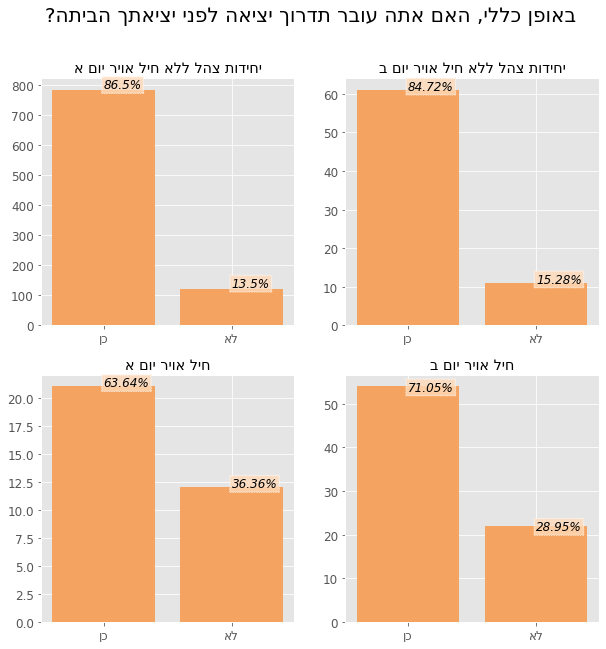

In [31]:
four_plot_nominal(12,'sandybrown','peachpuff')

# סוגי אמצעי תחבורה

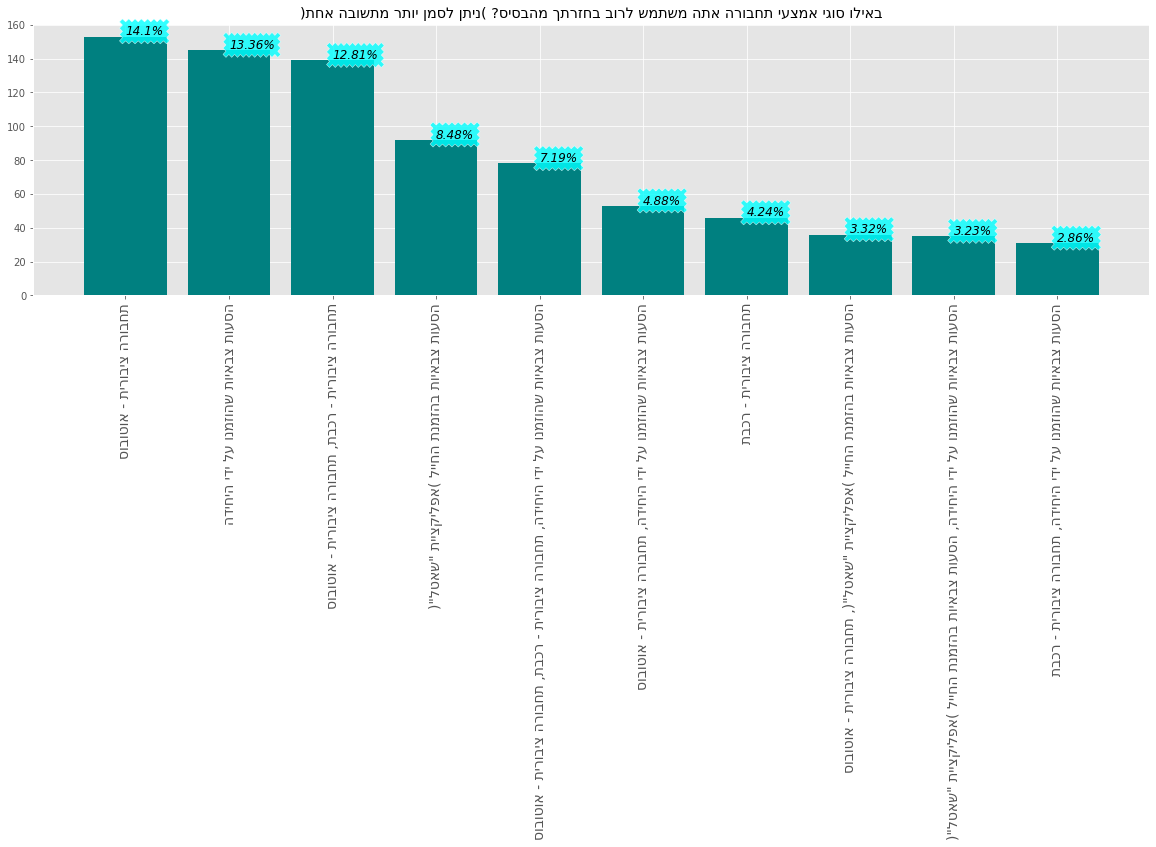

In [32]:
all_plot_nominal3(20,10)

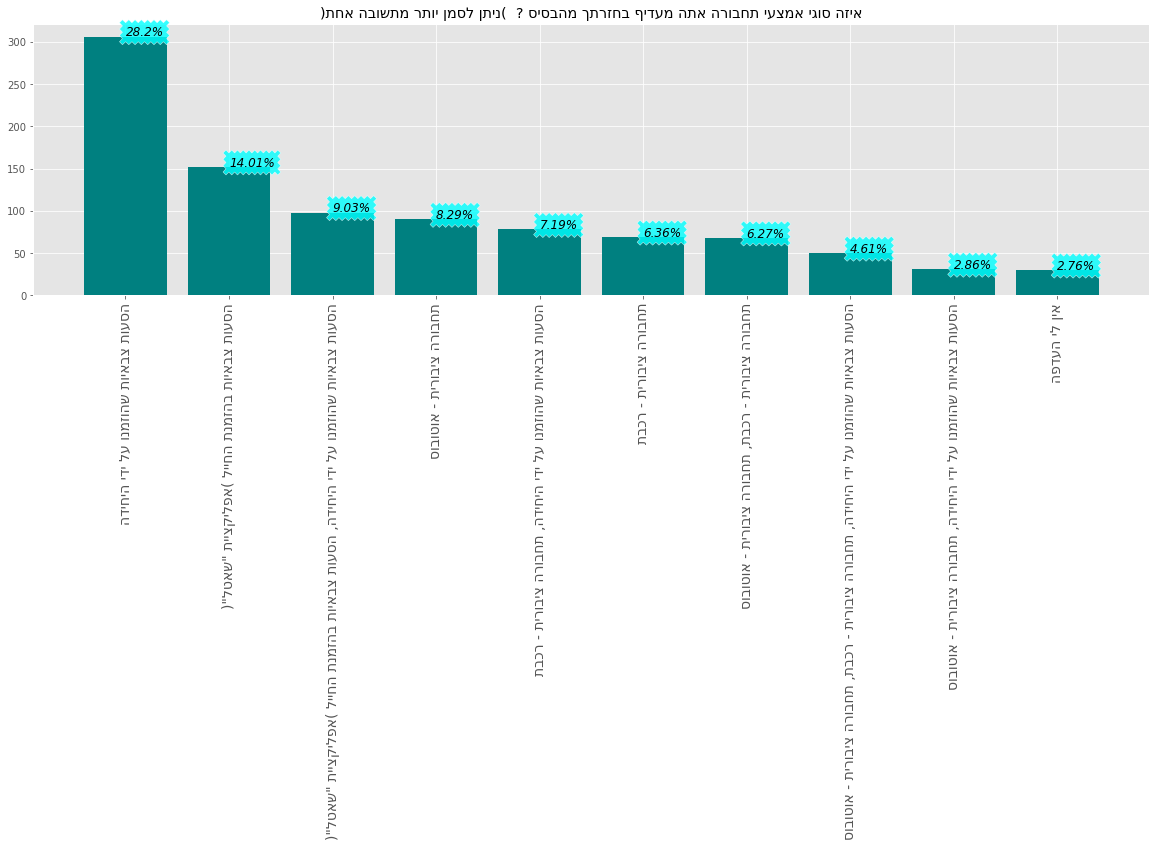

In [33]:
all_plot_nominal3(21,10)

C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


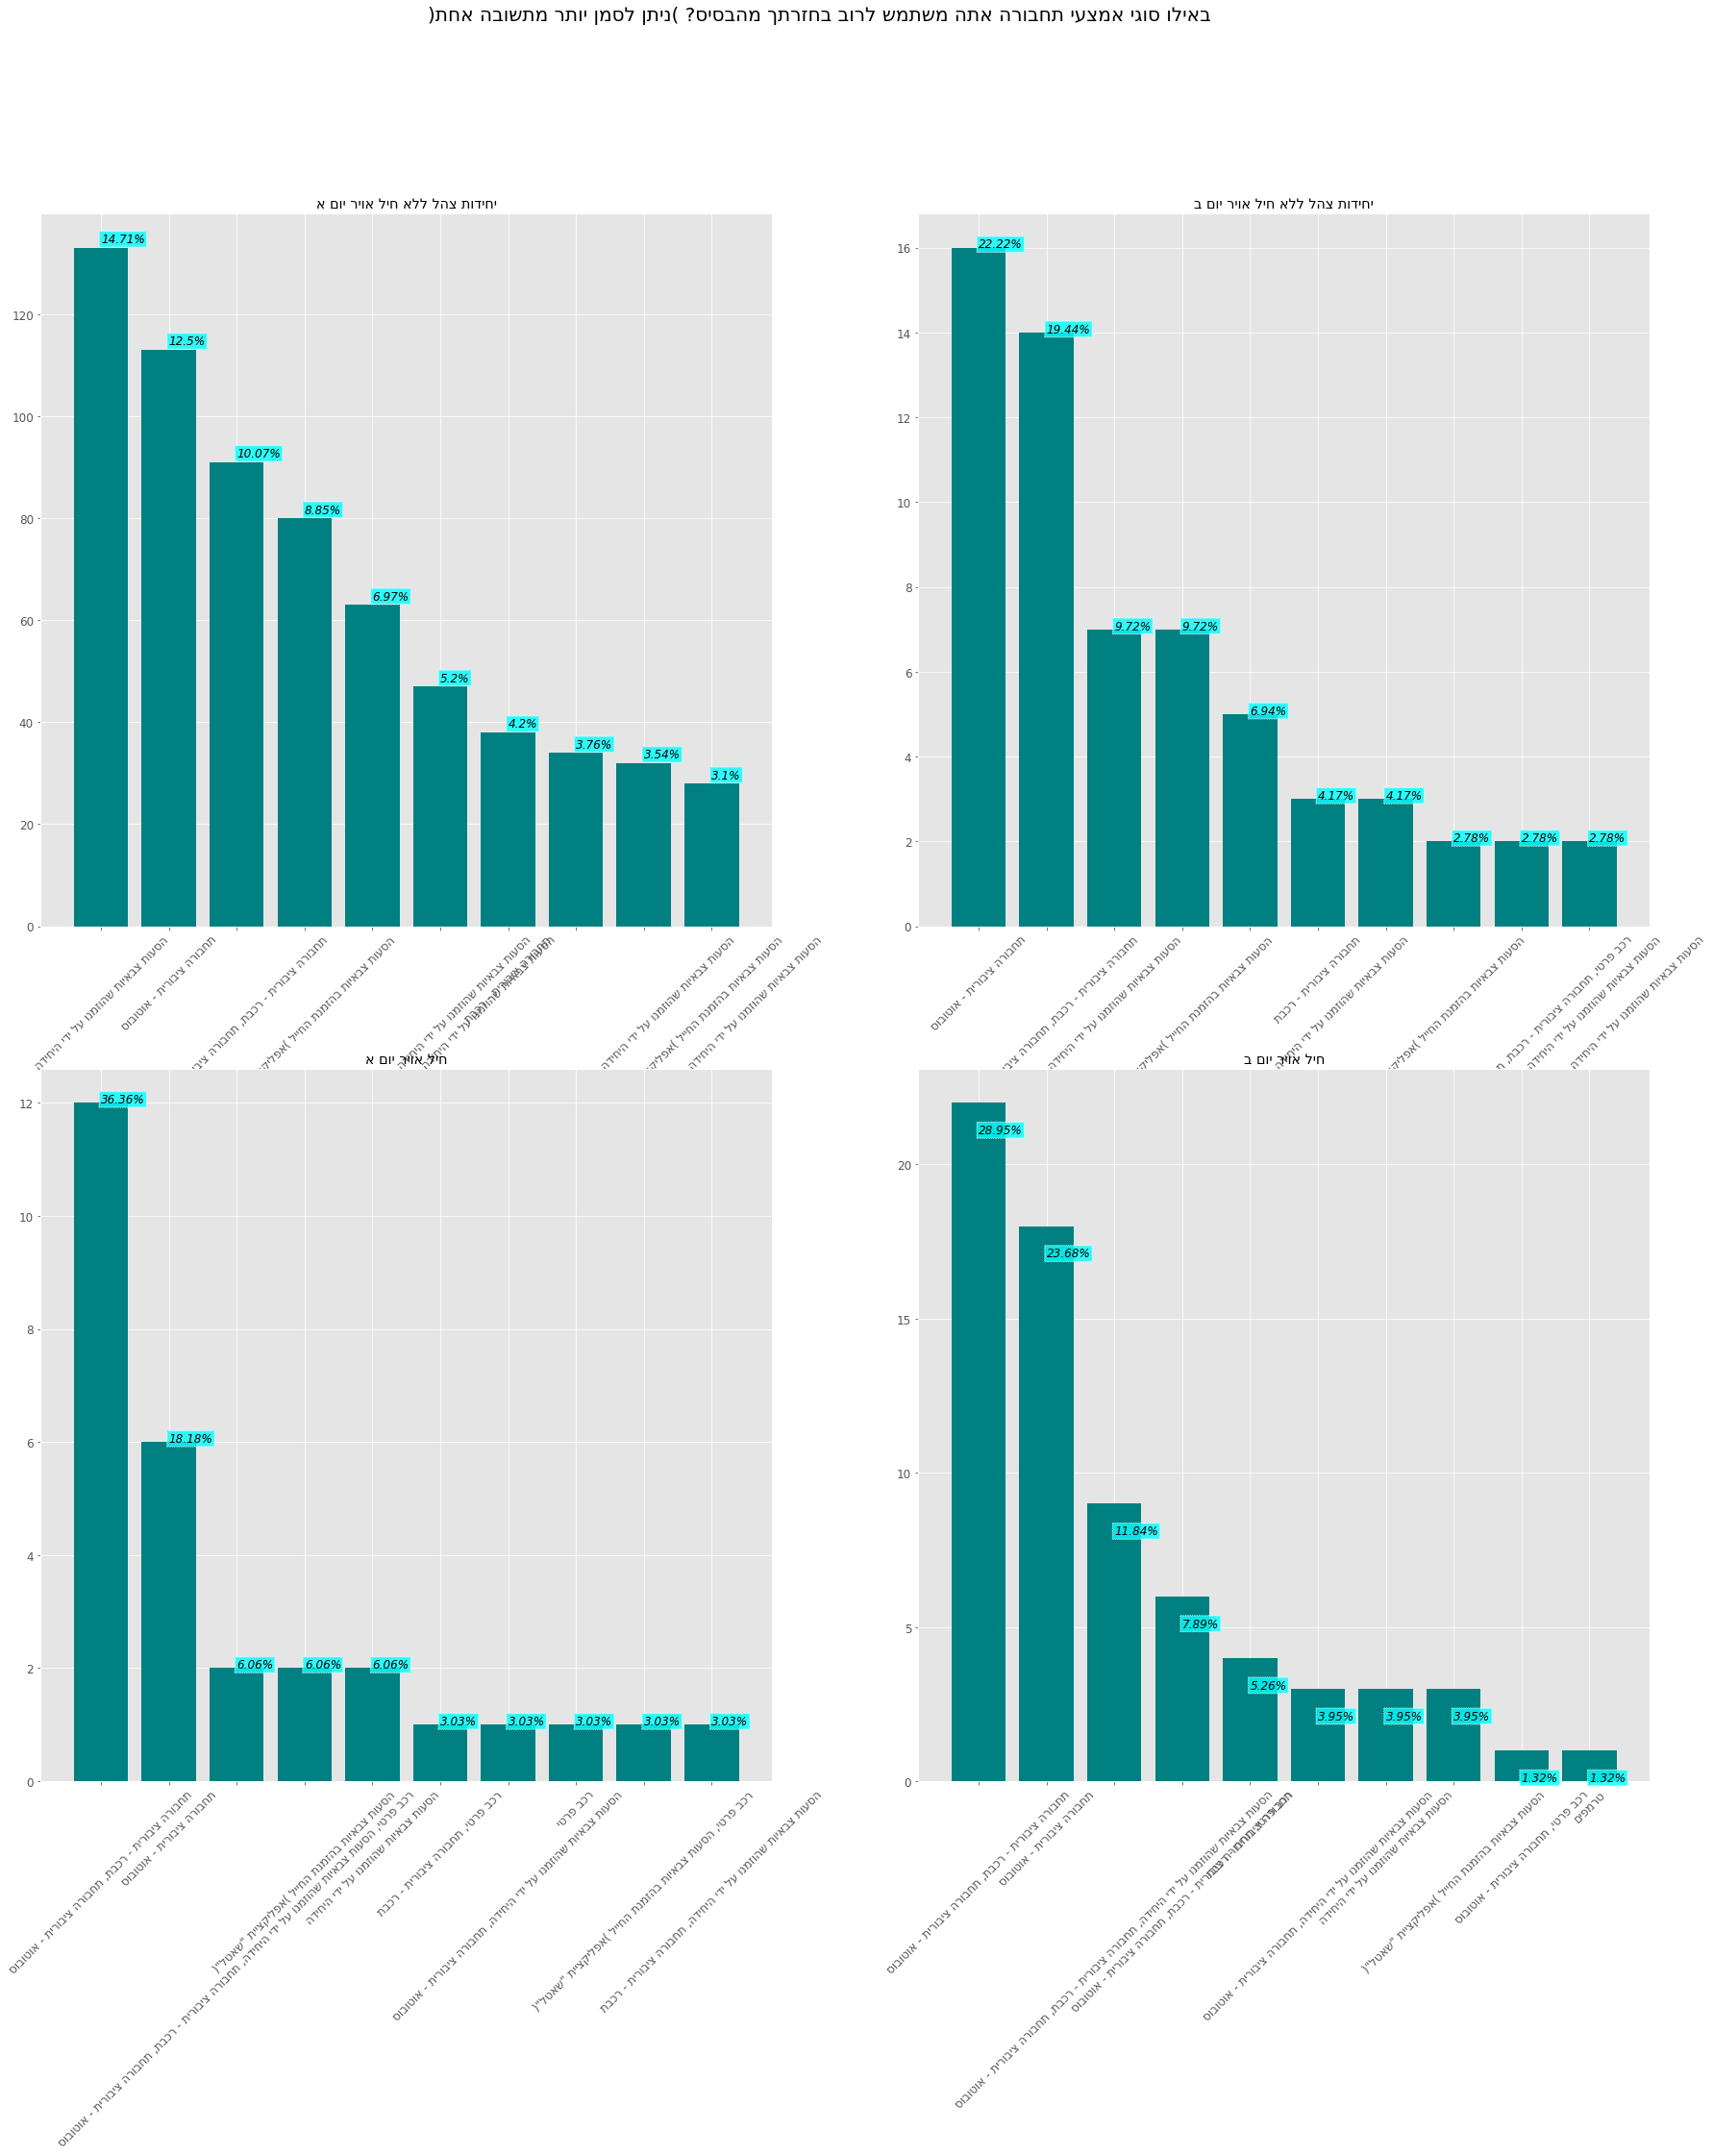

In [34]:
four_plot_nominal2(20,10,30,30)

# אמצעי תחבורה

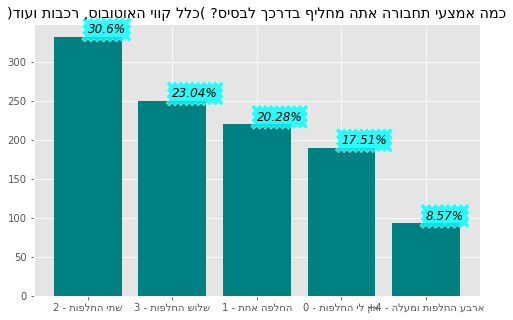

In [35]:
all_plot_nominal(18)

C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels,rotation=45)
C:\Users\97254\AppData\Local\Temp/ipykernel_29084/2630356933.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels,rotation=45)


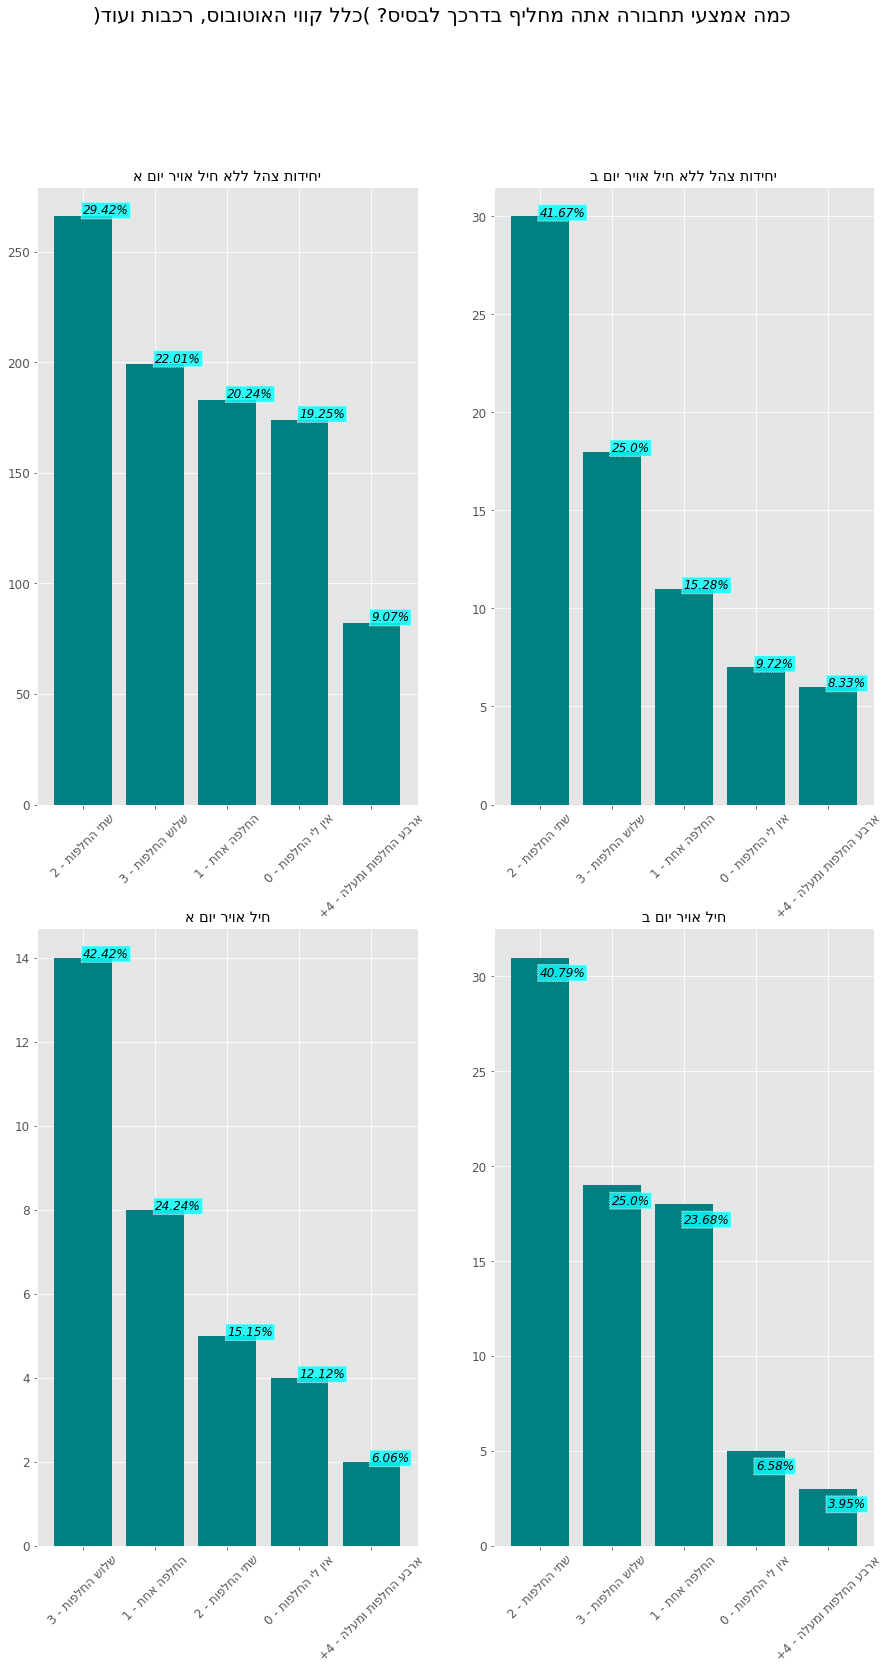

In [36]:
four_plot_nominal2(18,5,25,15)

# הכרה של שאט"ל + שביעות רצון הגעה וחזרה

In [37]:
df = all_data.groupby(by = all_data.columns[23]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                          count   
האם אתה מכיר את אפליקציית "שאטל"?                                                 
כן                                                                          617   
לא                                                                          467   

                                             \
                                       mean   
האם אתה מכיר את אפליקציית "שאטל"?             
כן                                 3.544571   
לא                                 3.284797   

                                  באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                           count   
האם אתה מכיר את אפליקציית "שאטל"?                                                  
כן                                                                           617   
לא                                                                           467   

                                             
                                       mean  
האם אתה מכיר את אפליקציית "שאטל"?            
כן                                 3.661264  
לא                                 3.325482

# שימוש שאט"ל + שביעות רצון הגעה וחזרה

In [38]:
df = all_data.groupby(by = all_data.columns[24]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                         count   
האם אתה משתמש באפליקציית "שאטל"?                                                 
לא                                                                         771   
כן                                                                         314   

                                            \
                                      mean   
האם אתה משתמש באפליקציית "שאטל"?             
לא                                3.285344   
כן                                3.799363   

                                 באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                          count   
האם אתה משתמש באפליקציית "שאטל"?                                                  
לא                                                                          771   
כן                                                                          314   

                                            
                                      mean  
האם אתה משתמש באפליקציית "שאטל"?            
לא                                3.357977  
כן                                3.910828

# הורדת שאט"ל שאט"ל + שביעות רצון הגעה וחזרה

In [39]:
df = all_data.groupby(by = all_data.columns[25]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                       count   
האם הורדת את אפליקציית "שאטל"?                                                 
לא                                                                       541   
כן                                                                       459   
הורדתי ומחקתי                                                             85   

                                          \
                                    mean   
האם הורדת את אפליקציית "שאטל"?             
לא                              3.295749   
כן                              3.627451   
הורדתי ומחקתי                   3.270588   

                               באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                        count   
האם הורדת את אפליקציית "שאטל"?                                                  
לא                                                                        541   
כן                                                                        459   
הורדתי ומחקתי                                                              85   

                                          
                                    mean  
האם הורדת את אפליקציית "שאטל"?            
לא                              3.332717  
כן                              3.777778  
הורדתי ומחקתי                   3.294118

In [40]:
df = all_data.groupby(by = all_data.columns[28]).agg(['count','mean']).iloc[:,4:8]
df.sort_values([df.columns[0],df.columns[1]], ascending = False).iloc[:10,:]

באיזו מידה הנך שבע רצון מדרך ההגעה שלך לבסיס?  \
                                                                                           count   
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?                                                 
5.0                                                                                          136   
4.0                                                                                          102   
3.0                                                                                           47   
2.0                                                                                           19   
1.0                                                                                           10   

                                                              \
                                                        mean   
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?             
5.0                                                 4.198529   
4.0                                                 3.578431   
3.0                                                 3.617021   
2.0                                                 2.947368   
1.0                                                 3.100000   

                                                   באיזו מידה הנך שבע רצון מדרך החזרה שלך מהבסיס?  \
                                                                                            count   
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?                                                  
5.0                                                                                           136   
4.0                                                                                           102   
3.0                                                                                            47   
2.0                                                                                            19   
1.0                                                                                            10   

                                                              
                                                        mean  
באיזו מידה הנך שבע רצון מהשימוש באפליקציית "שאטל"?            
5.0                                                 4.272059  
4.0                                                 3.901961  
3.0                                                 3.638298  
2.0                                                 2.842105  
1.0                                                 2.400000

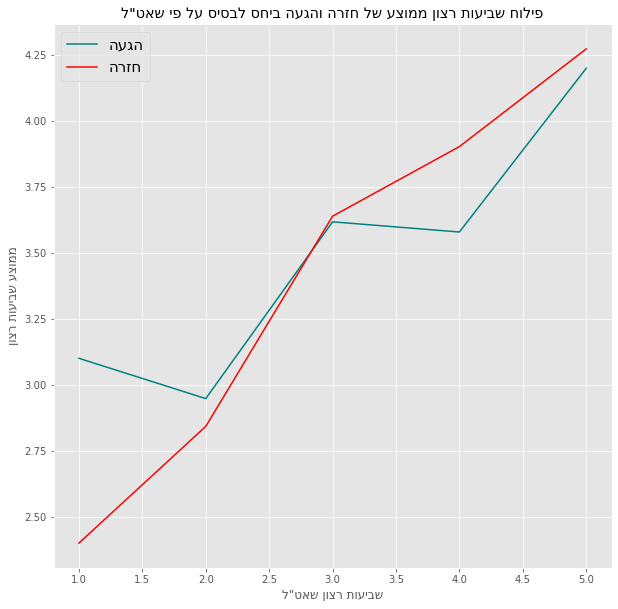

In [41]:
x = df.index.tolist()
y1 = df.iloc[:,1].tolist()
y2 = df.iloc[:,3].tolist()
plt.figure(figsize = (10,10))
plt.plot(x,y1, color = 'teal')
plt.plot(x,y2, color = 'red')
plt.title('פילוח שביעות רצון ממוצע של חזרה והגעה ביחס לבסיס על פי שאט"ל'[::-1])
plt.xlabel('שביעות רצון שאט"ל'[::-1])
plt.ylabel('ממוצע שביעות רצון'[::-1])
plt.legend(labels = ["הגעה"[::-1],"חזרה"[::-1]], fontsize = 15)
plt.show()

# הוגדר הגעה לבסיס

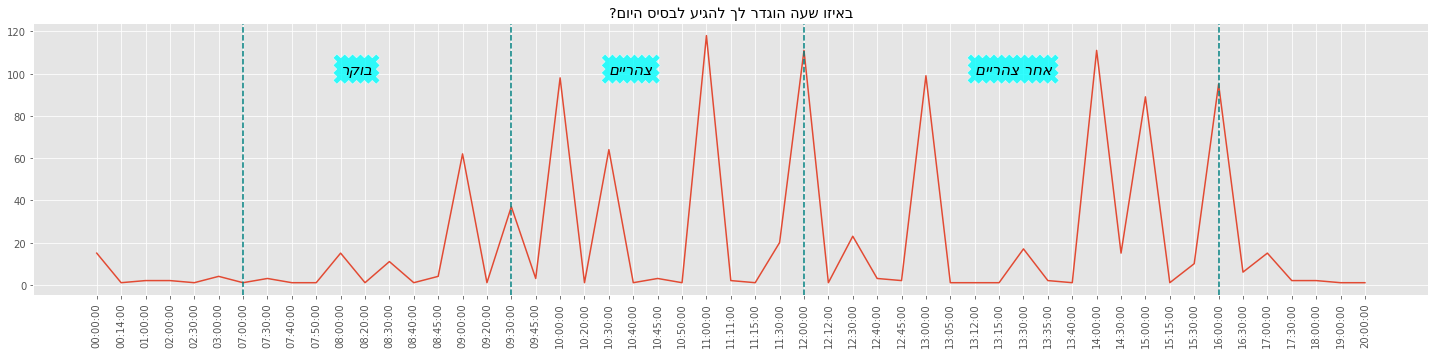

In [42]:
import datetime
plt.figure(figsize = (25,5))
x = pd.to_datetime(all_data.iloc[:,8],format='%H%M%S', errors='ignore')
x = x.value_counts().sort_index()
plt.xticks(rotation = 90)
plt.plot(x)
plt.title(all_data.columns[8][::-1])
plt.axvline(x='07:00:00',linestyle = '--', color = 'teal')
plt.text('08:00:00', 100,'בוקר'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='09:30:00',linestyle = '--', color = 'teal')
plt.text('10:30:00', 100,'צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='12:00:00',linestyle = '--', color = 'teal')
plt.text('13:12:00', 100,'אחר צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='16:00:00',linestyle = '--', color = 'teal')
plt.show()

#  מעריך הגעה לבסיס

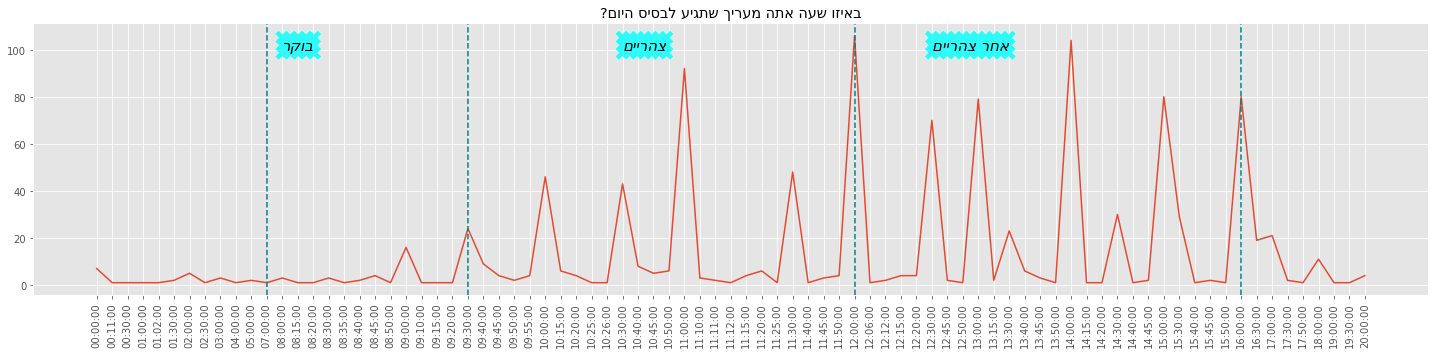

In [106]:
import datetime
plt.figure(figsize = (25,5))
x = pd.to_datetime(all_data.iloc[:,9],format='%H%M%S', errors='ignore')
x = x.value_counts().sort_index()
plt.xticks(rotation = 90)
plt.plot(x)

plt.axvline(x='07:00:00',linestyle = '--', color = 'teal')
plt.text('08:00:00', 100,'בוקר'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='09:30:00',linestyle = '--', color = 'teal')
plt.text('10:30:00', 100,'צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='12:00:00',linestyle = '--', color = 'teal')
plt.text('12:30:00', 100,'אחר צהריים'[::-1],size=15,style = 'italic',color = "black",bbox=dict(facecolor="aqua",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.axvline(x='16:00:00',linestyle = '--', color = 'teal')
plt.title(all_data.columns[9][::-1])
plt.show()

# חלוקת זמן למקום הגעה

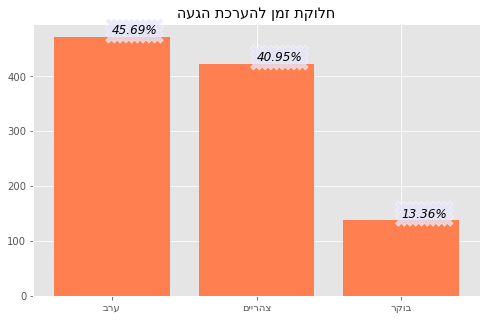

In [44]:
all_plot_nominal(38,plot_color = 'coral',text_color ='lavender')

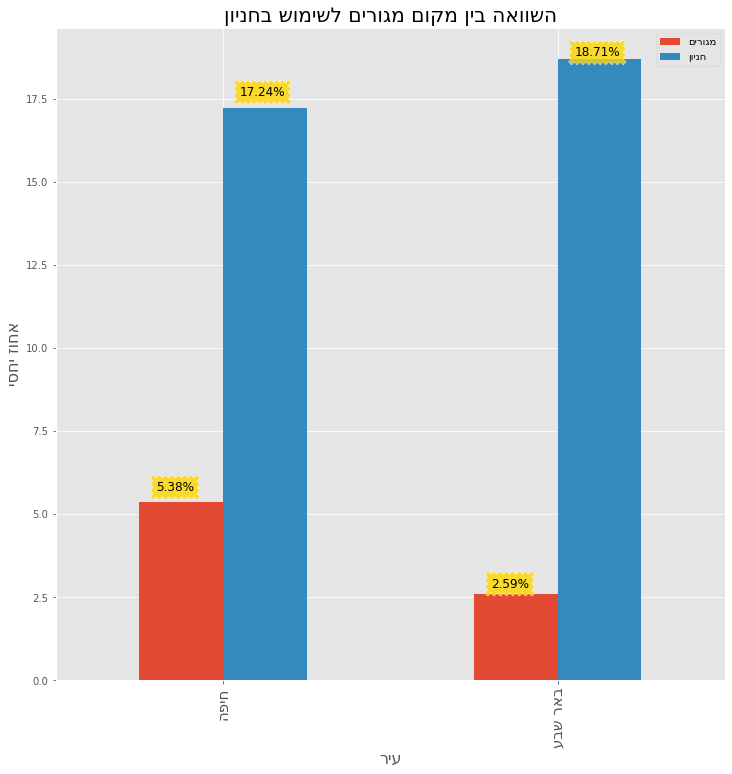

In [45]:

henion = [all_data[all_data.columns[5]].value_counts(normalize = True)["חניון חוף זמיר חיפה"],
           all_data[all_data.columns[5]].value_counts(normalize = True)["תחנה מרכזית באר שבע"]]

megurim = [all_data[all_data.columns[3]].value_counts(normalize = True)["חיפה"],
          all_data[all_data.columns[3]].value_counts(normalize = True)["באר שבע "]]
labels =  [label[::-1] for label in ["חיפה","באר שבע"]]
df = pd.DataFrame({"עיר"[::-1]:labels,"מגורים"[::-1]:[round(r*100,2) for r in megurim],"חניון"[::-1]:[round(r*100,2) for r in henion]})
df.plot(x=df.columns[0], y=df.columns[1:3], kind="bar",figsize = (12,12))
plt.title("השוואה בין מקום מגורים לשימוש בחניון"[::-1], size = 20)
plt.text(0.05,17.6,f"{df.iloc[0,2]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.text(-0.2,5.7,f"{df.iloc[0,1]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.text(1.05,18.8,f"{df.iloc[1,2]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.text(0.8,2.8,f"{df.iloc[1,1]}%",size=12,bbox=dict(facecolor="gold",alpha=0.8, edgecolor='white', boxstyle='Sawtooth,pad=0.5'))
plt.ylabel("אחוז יחסי"[::-1],size =16)
plt.xticks(size = 15)
plt.xlabel(df.columns[0],size =16)

plt.show()

# הצלבה בין ערים לחניונים

In [46]:
megurim_henion = pd.crosstab(all_data[all_data.columns[3]],all_data[all_data.columns[5]])
megurim_henion.columns = [i[::-1] for i in megurim_henion.columns]

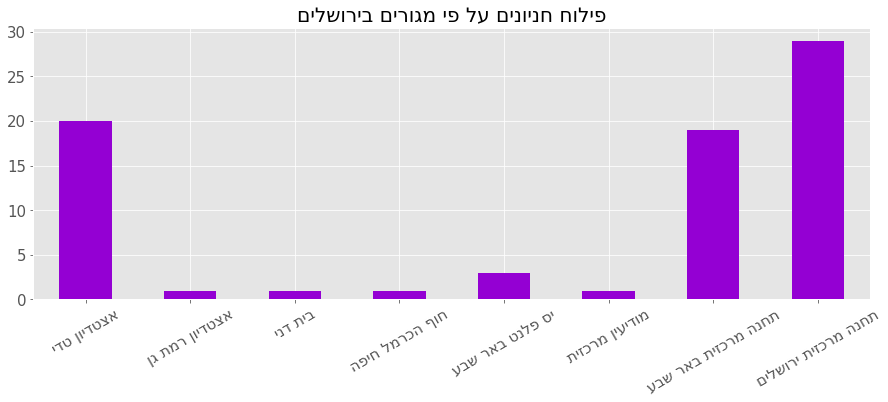

In [47]:
r = "ירושלים"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1], size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

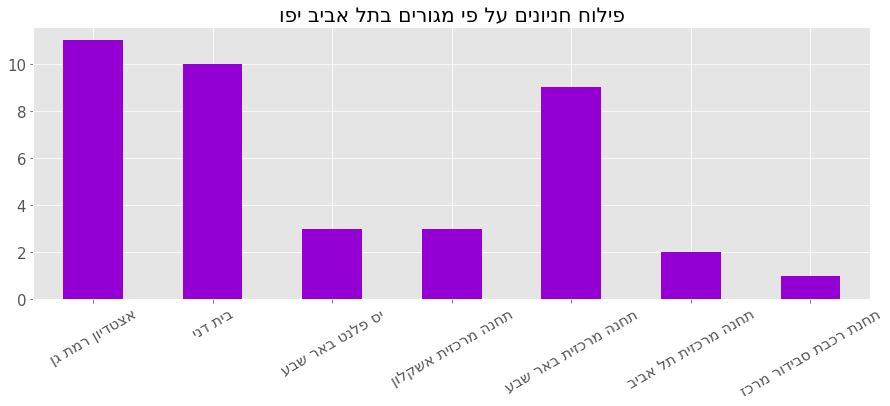

In [48]:
r = "תל אביב יפו"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

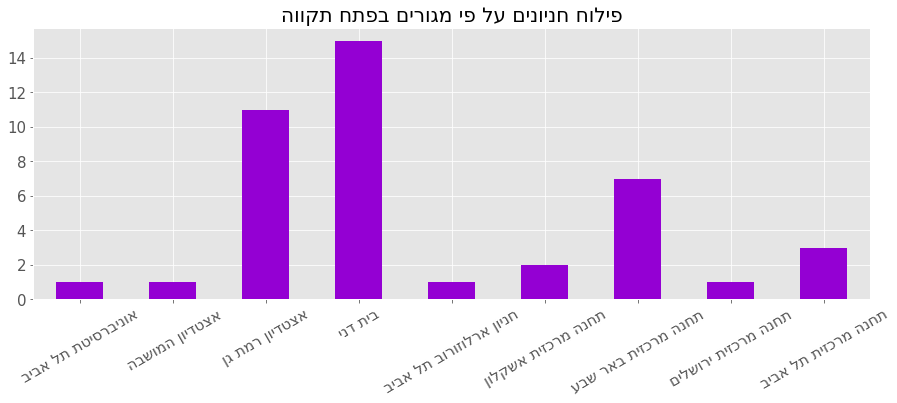

In [49]:
r = "פתח תקווה"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

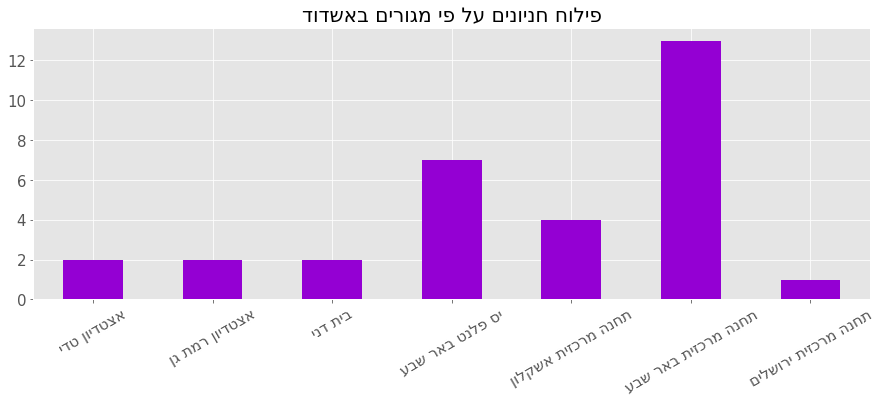

In [50]:
r = "אשדוד"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

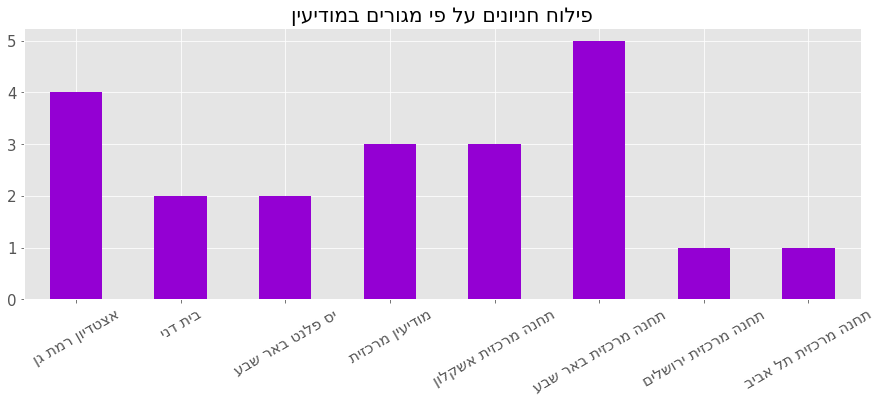

In [51]:
r = "מודיעין"
megurim_henion.loc[r][megurim_henion.loc[r]>0].plot(kind = "bar", figsize = (15,5), color = 'darkviolet')
#for j in range(len(megurim_henion.loc[r][megurim_henion.loc[r]>0].index.tolist())):
    #txt = f"{megurim_henion.loc[r][megurim_henion.loc[r]>0].value_counts()[j]}"
plt.title(f"פילוח חניונים על פי מגורים ב{r}"[::-1],size = 20)
plt.xticks(size = 15,rotation = 30)
plt.yticks(size = 15)
plt.show()

# הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לתחנת הסעה

In [52]:
df = all_data.groupby(by = [all_data.columns[3],all_data.columns[5]]).agg(['sum']).iloc[:,4:5]
df.to_csv('הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לתחנת הסעה.csv')

# הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לכמה אמצעי תחבורה מחליף

In [53]:
df = all_data.groupby(by = [all_data.columns[3],all_data.columns[5],all_data.columns[7]]).agg(['sum']).iloc[:,14:15]
df.to_csv('הצלבה בין מקום מגורים תחנת הסעה סיבת הגעה לכמה אמצעי תחבורה מחליף.csv')

# הצלבה בין תדרוך יציאה להנחיות הגעה

In [54]:
round(pd.crosstab(all_data[all_data.columns[12]],all_data[all_data.columns[13]], margins = True,normalize = True)*100,2)

באופן כללי האם אתה מקבל הנחיות הגעה לבסיס? (בתדרוך היציאה/ בכלל),כן,לא,All
"באופן כללי, האם אתה עובר תדרוך יציאה לפני יציאתך הביתה?",,,
כן,60.78,26.89,87.68
לא,2.24,10.08,12.32
All,63.03,36.97,100.00


# הצלבה בין כמה מכירים שאט"ל כמה הורידו וכמה משתמשים
גרף של שלושתם

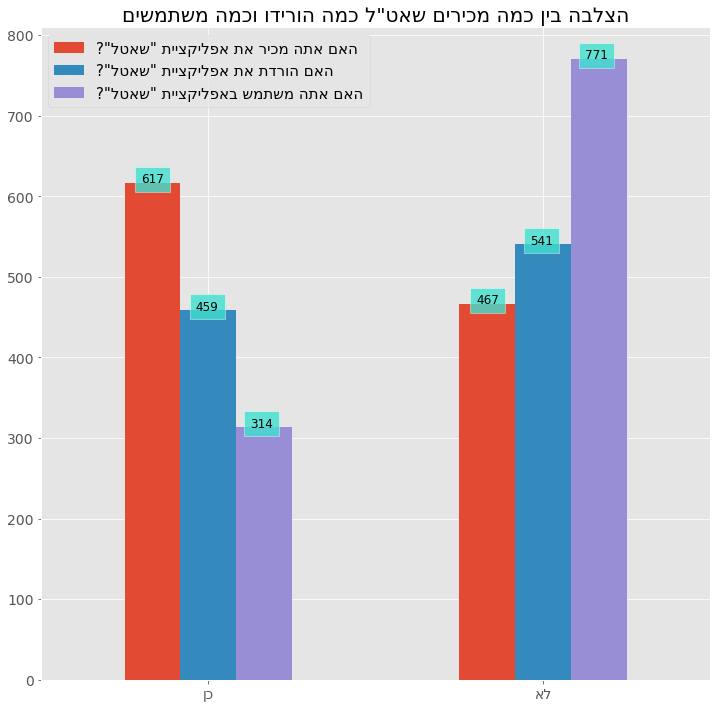

In [108]:
y = all_data[all_data.columns[23]].value_counts().sort_index().index.tolist()[:2]
x1 = all_data[all_data.columns[23]].value_counts().sort_index().tolist()[:2]
x2 = all_data[all_data.columns[24]].value_counts().sort_index().tolist()[:2]
x3 = all_data[all_data.columns[25]].value_counts().sort_index().tolist()[1:3]

df = pd.DataFrame({"כן/לא"[::-1]:[label[::-1] for label in y],all_data.columns[23][::-1]:x1,all_data.columns[24][::-1]:x2,all_data.columns[25][::-1]:x3})
df.plot(x=df.columns[0], y=[df.columns[1],df.columns[3],df.columns[2]], kind="bar",figsize = (12,12))
plt.xticks(rotation = 0, size = 12)
title = 'הצלבה בין כמה מכירים שאט"ל כמה הורידו וכמה משתמשים'
plt.title(title[::-1], size= 20)
plt.legend(fontsize = 15)
#plt.text(-0.2,650,"*הורידו ומחקו: 17"[::-1], fontsize = 20)
plt.text(0.125,df.iloc[0,2],f"{df.iloc[0,2]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.0375,df.iloc[0,3],f"{df.iloc[0,3]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.2,df.iloc[0,1],f"{df.iloc[0,1]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))

plt.text(1.125,df.iloc[1,2],f"{df.iloc[1,2]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.0375 + 1,df.iloc[1,3],f"{df.iloc[1,3]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.text(-0.2 + 1,df.iloc[1,1],f"{df.iloc[1,1]}",size=12,bbox=dict(facecolor="turquoise",alpha=0.8, edgecolor='white', boxstyle='Square,pad=0.5'))
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.xlabel(' ')
plt.show()

# תדירות שימוש

In [57]:
round(pd.crosstab(all_data[all_data.columns[29]],all_data[all_data.columns[24]],normalize = True)*100,2)

"האם אתה משתמש באפליקציית ""שאטל""?",כן
באיזו תדירות אתה משתמש באפליקצייה?,
1.0,5.73
2.0,8.92
3.0,22.61
4.0,23.89
5.0,38.85
